In [1]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
plt.rcParams['figure.dpi'] = 140
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

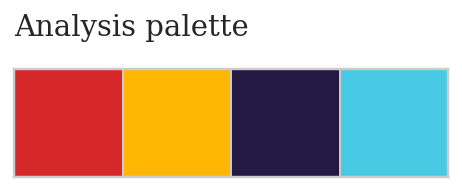

In [3]:
# Palette
sns.palplot(['#d62828', '#ffb703', '#231942','#48cae4'])
custom_color = ['#d62828', '#ffb703', '#231942','#48cae4']

plt.title("Analysis palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [4]:
df = pd.read_csv('/kaggle/input/train-set/train.csv')

In [5]:
df.sample(5)

Id  satisfaction  Gender      Customer Type  Age   Type of Travel  \
1175    92511     satisfied  Female     Loyal Customer   40  Business travel   
68416   49380  dissatisfied    Male  disloyal Customer   29  Business travel   
9781     2598     satisfied  Female     Loyal Customer   24  Personal Travel   
3172    45974  dissatisfied    Male  disloyal Customer   38  Business travel   
3770   118148     satisfied    Male     Loyal Customer   39  Business travel   

          Class  Flight Distance  Seat comfort  \
1175   Business             3336             4   
68416       Eco             1932             2   
9781        Eco             3528             5   
3172   Business             1609             2   
3770   Business             2038             5   

       Departure/Arrival time convenient  ...  Online support  \
1175                                   4  ...               1   
68416                                  3  ...               5   
9781                                   3  ...               3   
3172                                   2  ...               5   
3770                                   5  ...               5   

       Ease of Online booking  On-board service  Leg room service  \
1175                        4                 4                 4   
68416                       2                 4                 4   
9781                        1                 1                 5   
3172                        5                 3                 4   
3770                        5                 5                 5   

       Baggage handling  Checkin service  Cleanliness  Online boarding  \
1175                  4                2            4                1   
68416                 2                1            2                2   
9781                  1                4            1                2   
3172                  4                5            5                5   
3770                  5                3            5                5   

       Departure Delay in Minutes  Arrival Delay in Minutes  
1175                            0                       0.0  
68416                           0                       0.0  
9781                            5                       0.0  
3172                            7                       8.0  
3770                           28                      28.0  

[5 rows x 24 columns]

# Data Preparation and Exploration
- What is the overall distribution of satisfied vs dissatisfied customers?
- Are there any missing or inconsistent data that need to be addressed?
- What are the ranges and distributions of numerical variables?
- Are there any outliers that might affect our analysis?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116892 entries, 0 to 116891
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Id                                 116892 non-null  int64  
 1   satisfaction                       116892 non-null  object 
 2   Gender                             116892 non-null  object 
 3   Customer Type                      116892 non-null  object 
 4   Age                                116892 non-null  int64  
 5   Type of Travel                     116892 non-null  object 
 6   Class                              116892 non-null  object 
 7   Flight Distance                    116892 non-null  int64  
 8   Seat comfort                       116892 non-null  int64  
 9   Departure/Arrival time convenient  116892 non-null  int64  
 10  Food and drink                     116892 non-null  int64  
 11  Gate location                      1168

In [7]:
def extract_column_types(df):
    # Identify time-related columns by checking their names
    time_columns = [col for col in df.columns if 'time' in col.lower() or 'delay' in col.lower()]
    
    # Extract categorical columns (object type)
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Extract numeric columns (int64 and float64 types)
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Remove time-related columns from numeric_columns (since they are considered separately)
    numeric_columns = [col for col in numeric_columns if col not in time_columns]

    return time_columns, categorical_columns, numeric_columns

time_cols, cat_cols, num_cols = extract_column_types(df)

print("Time Columns:", time_cols)
print("Categorical Columns:", cat_cols)
print("Numeric Columns:", num_cols)

Time Columns: ['Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Categorical Columns: ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
Numeric Columns: ['Id', 'Age', 'Flight Distance', 'Seat comfort', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']


# Overall Distribution of Satisfied vs. Dissatisfied Customers:

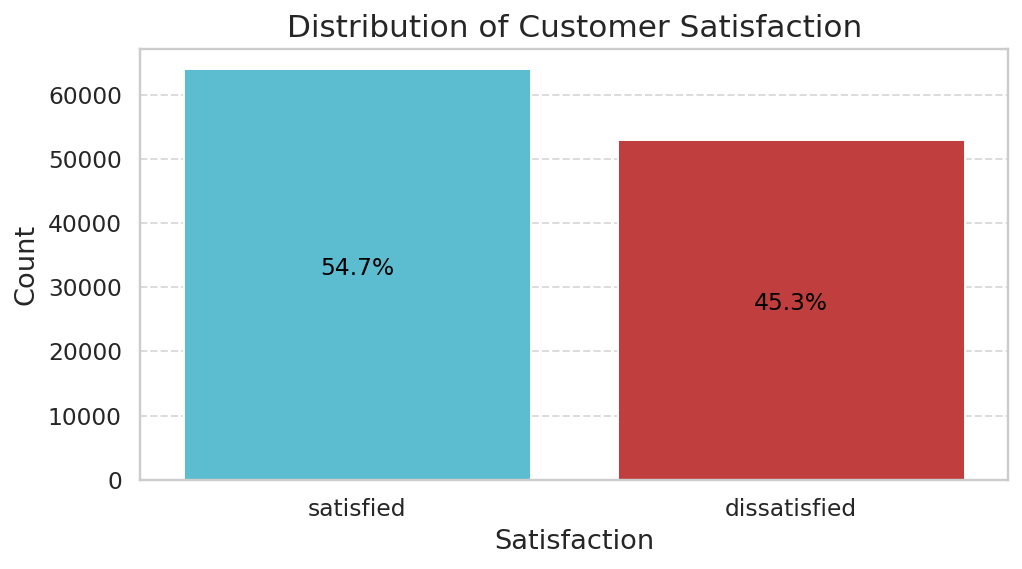

In [8]:
plt.figure(figsize=(8, 4))
satisfaction_counts = df['satisfaction'].value_counts()
total_counts = satisfaction_counts.sum()
percentage_counts = (satisfaction_counts / total_counts) * 100

# Create the bar plot
bar_plot = sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette=['#48cae4', '#d62828'])

# Adding counts and percentages on top of the bars
for i, (count, percentage) in enumerate(zip(satisfaction_counts.values, percentage_counts)):
    # Percentage annotations
    plt.text(i, count / 2, f'{percentage:.1f}%', ha='center', color='black',)

plt.title('Distribution of Customer Satisfaction', fontsize=16)
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Checking for Missing or Inconsistent Data:

In [9]:
def check_missing_data(df):
    missing_data = df.isna().sum()  # Calculate total missing values for each column
    missing_rate = df.isna().mean() * 100  # Calculate the percentage of missing values for each column

    missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Missing Rate (%)': missing_rate})
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Rate (%)', ascending=False)  # Filter and sort columns with missing data

    if missing_summary.empty:
        print("No missing data found.")
    else:
        for col, row in missing_summary.iterrows():
            print(f"{col}: {row['Missing Values']} missing values ({row['Missing Rate (%)']:.2f}%)")

In [10]:
check_missing_data(df)

Arrival Delay in Minutes: 351.0 missing values (0.30%)


In [11]:
df.dropna(inplace=True)

In [12]:
# Check unique values in categorical columns
categorical_cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

satisfaction unique values: ['satisfied' 'dissatisfied']
Gender unique values: ['Male' 'Female']
Customer Type unique values: ['Loyal Customer' 'disloyal Customer']
Type of Travel unique values: ['Business travel' 'Personal Travel']
Class unique values: ['Business' 'Eco' 'Eco Plus']


In [13]:
df.drop('Id', inplace=True,axis=1)

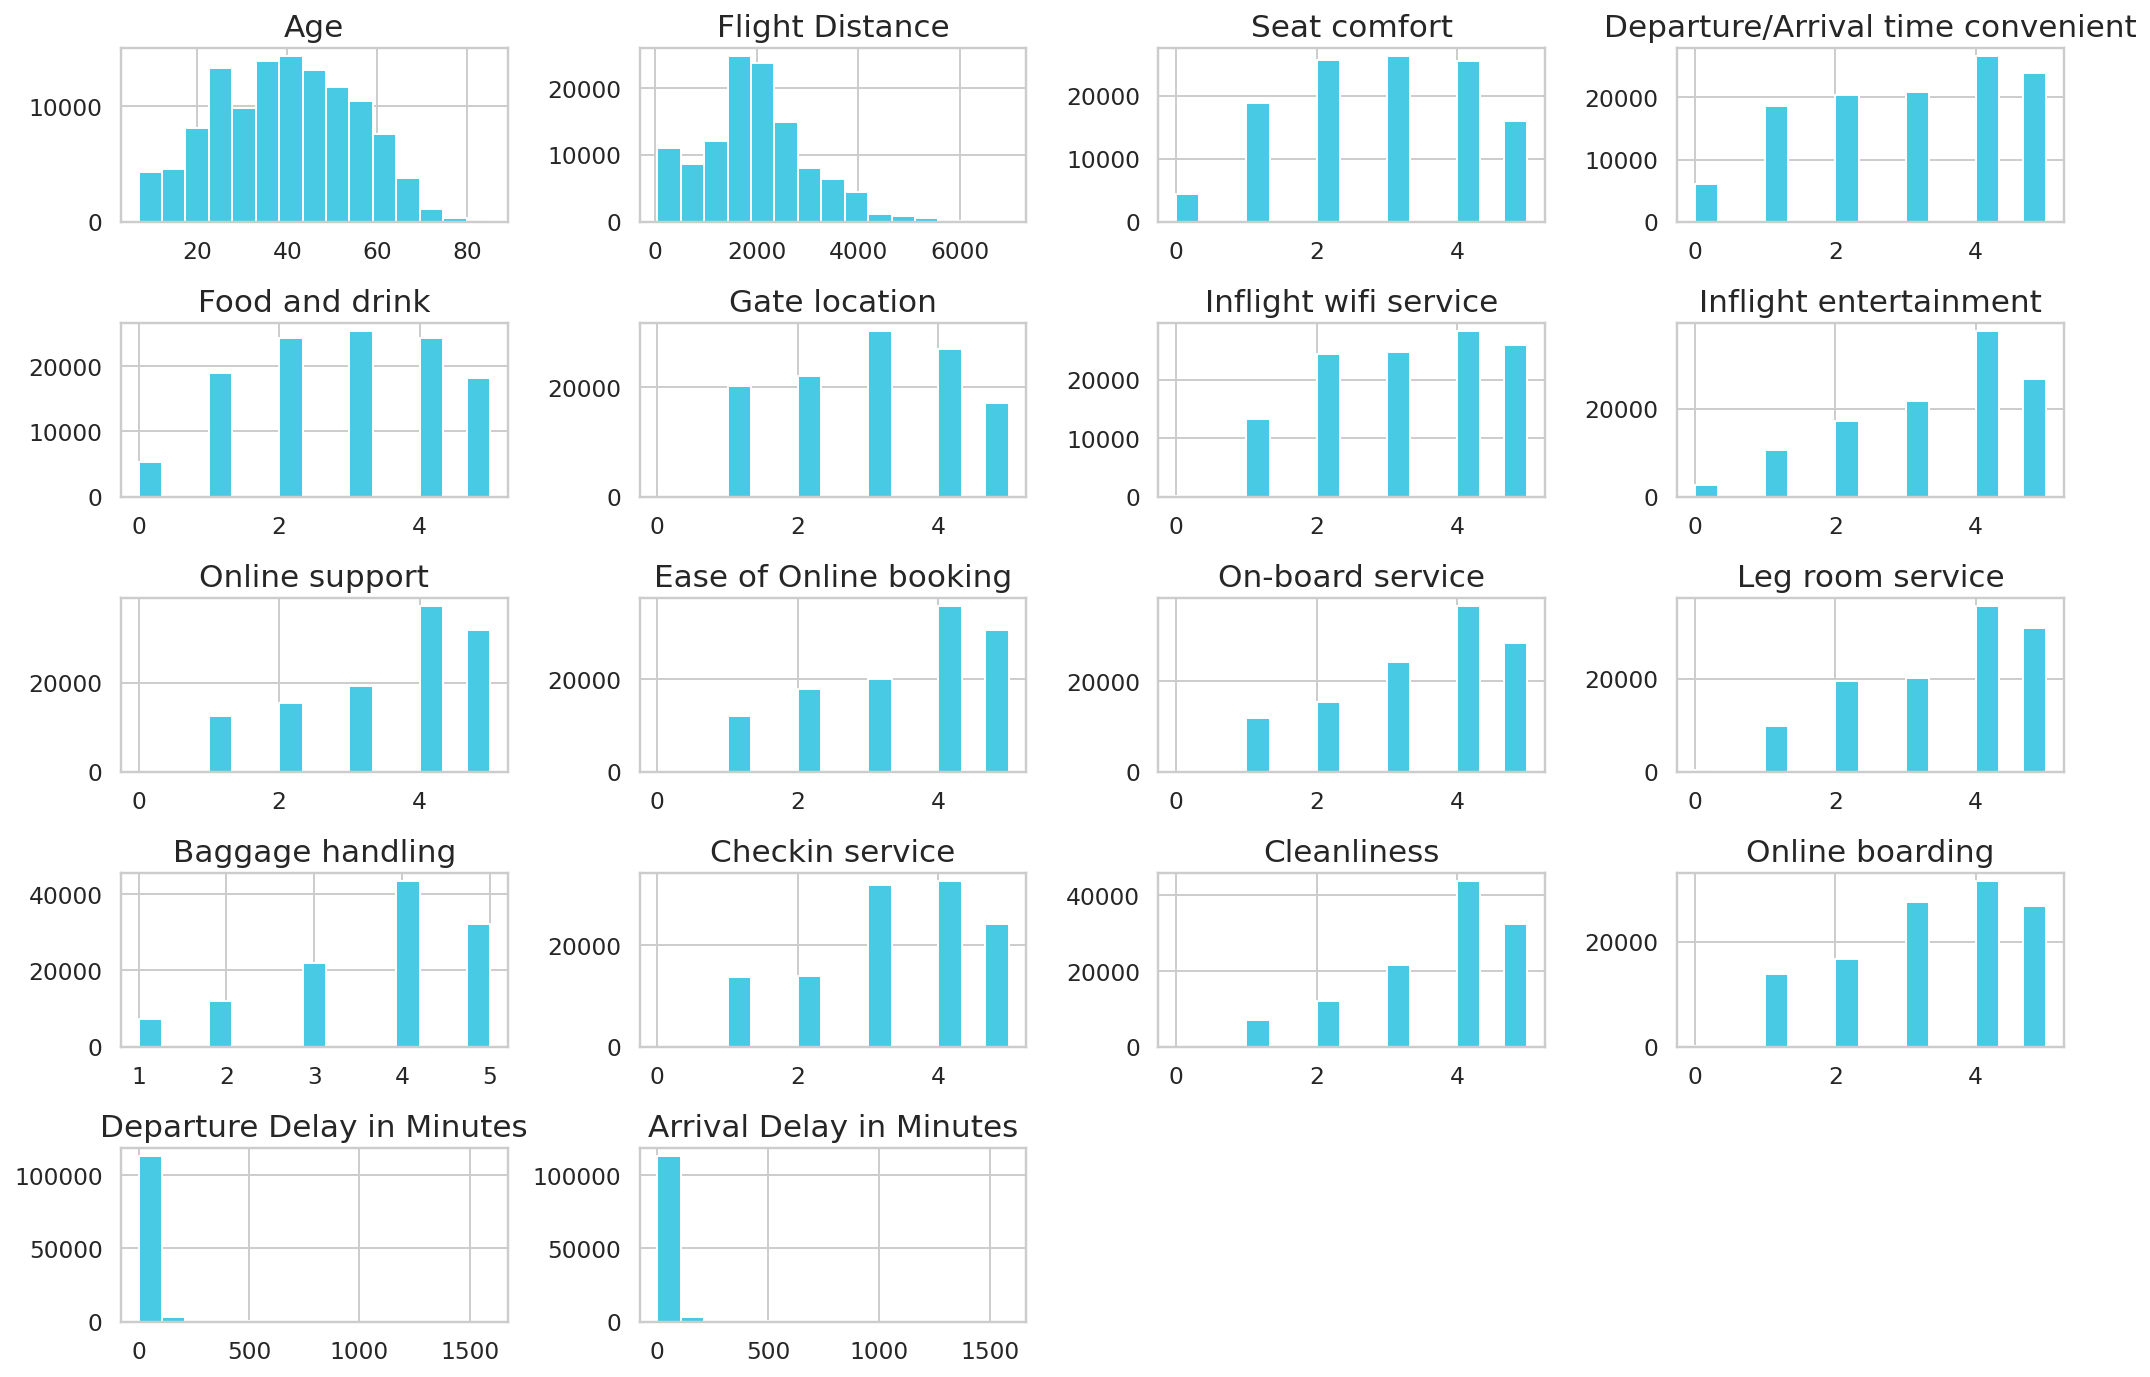

In [14]:
# Visualizing distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10),color=custom_color[3])
plt.tight_layout()
plt.show()

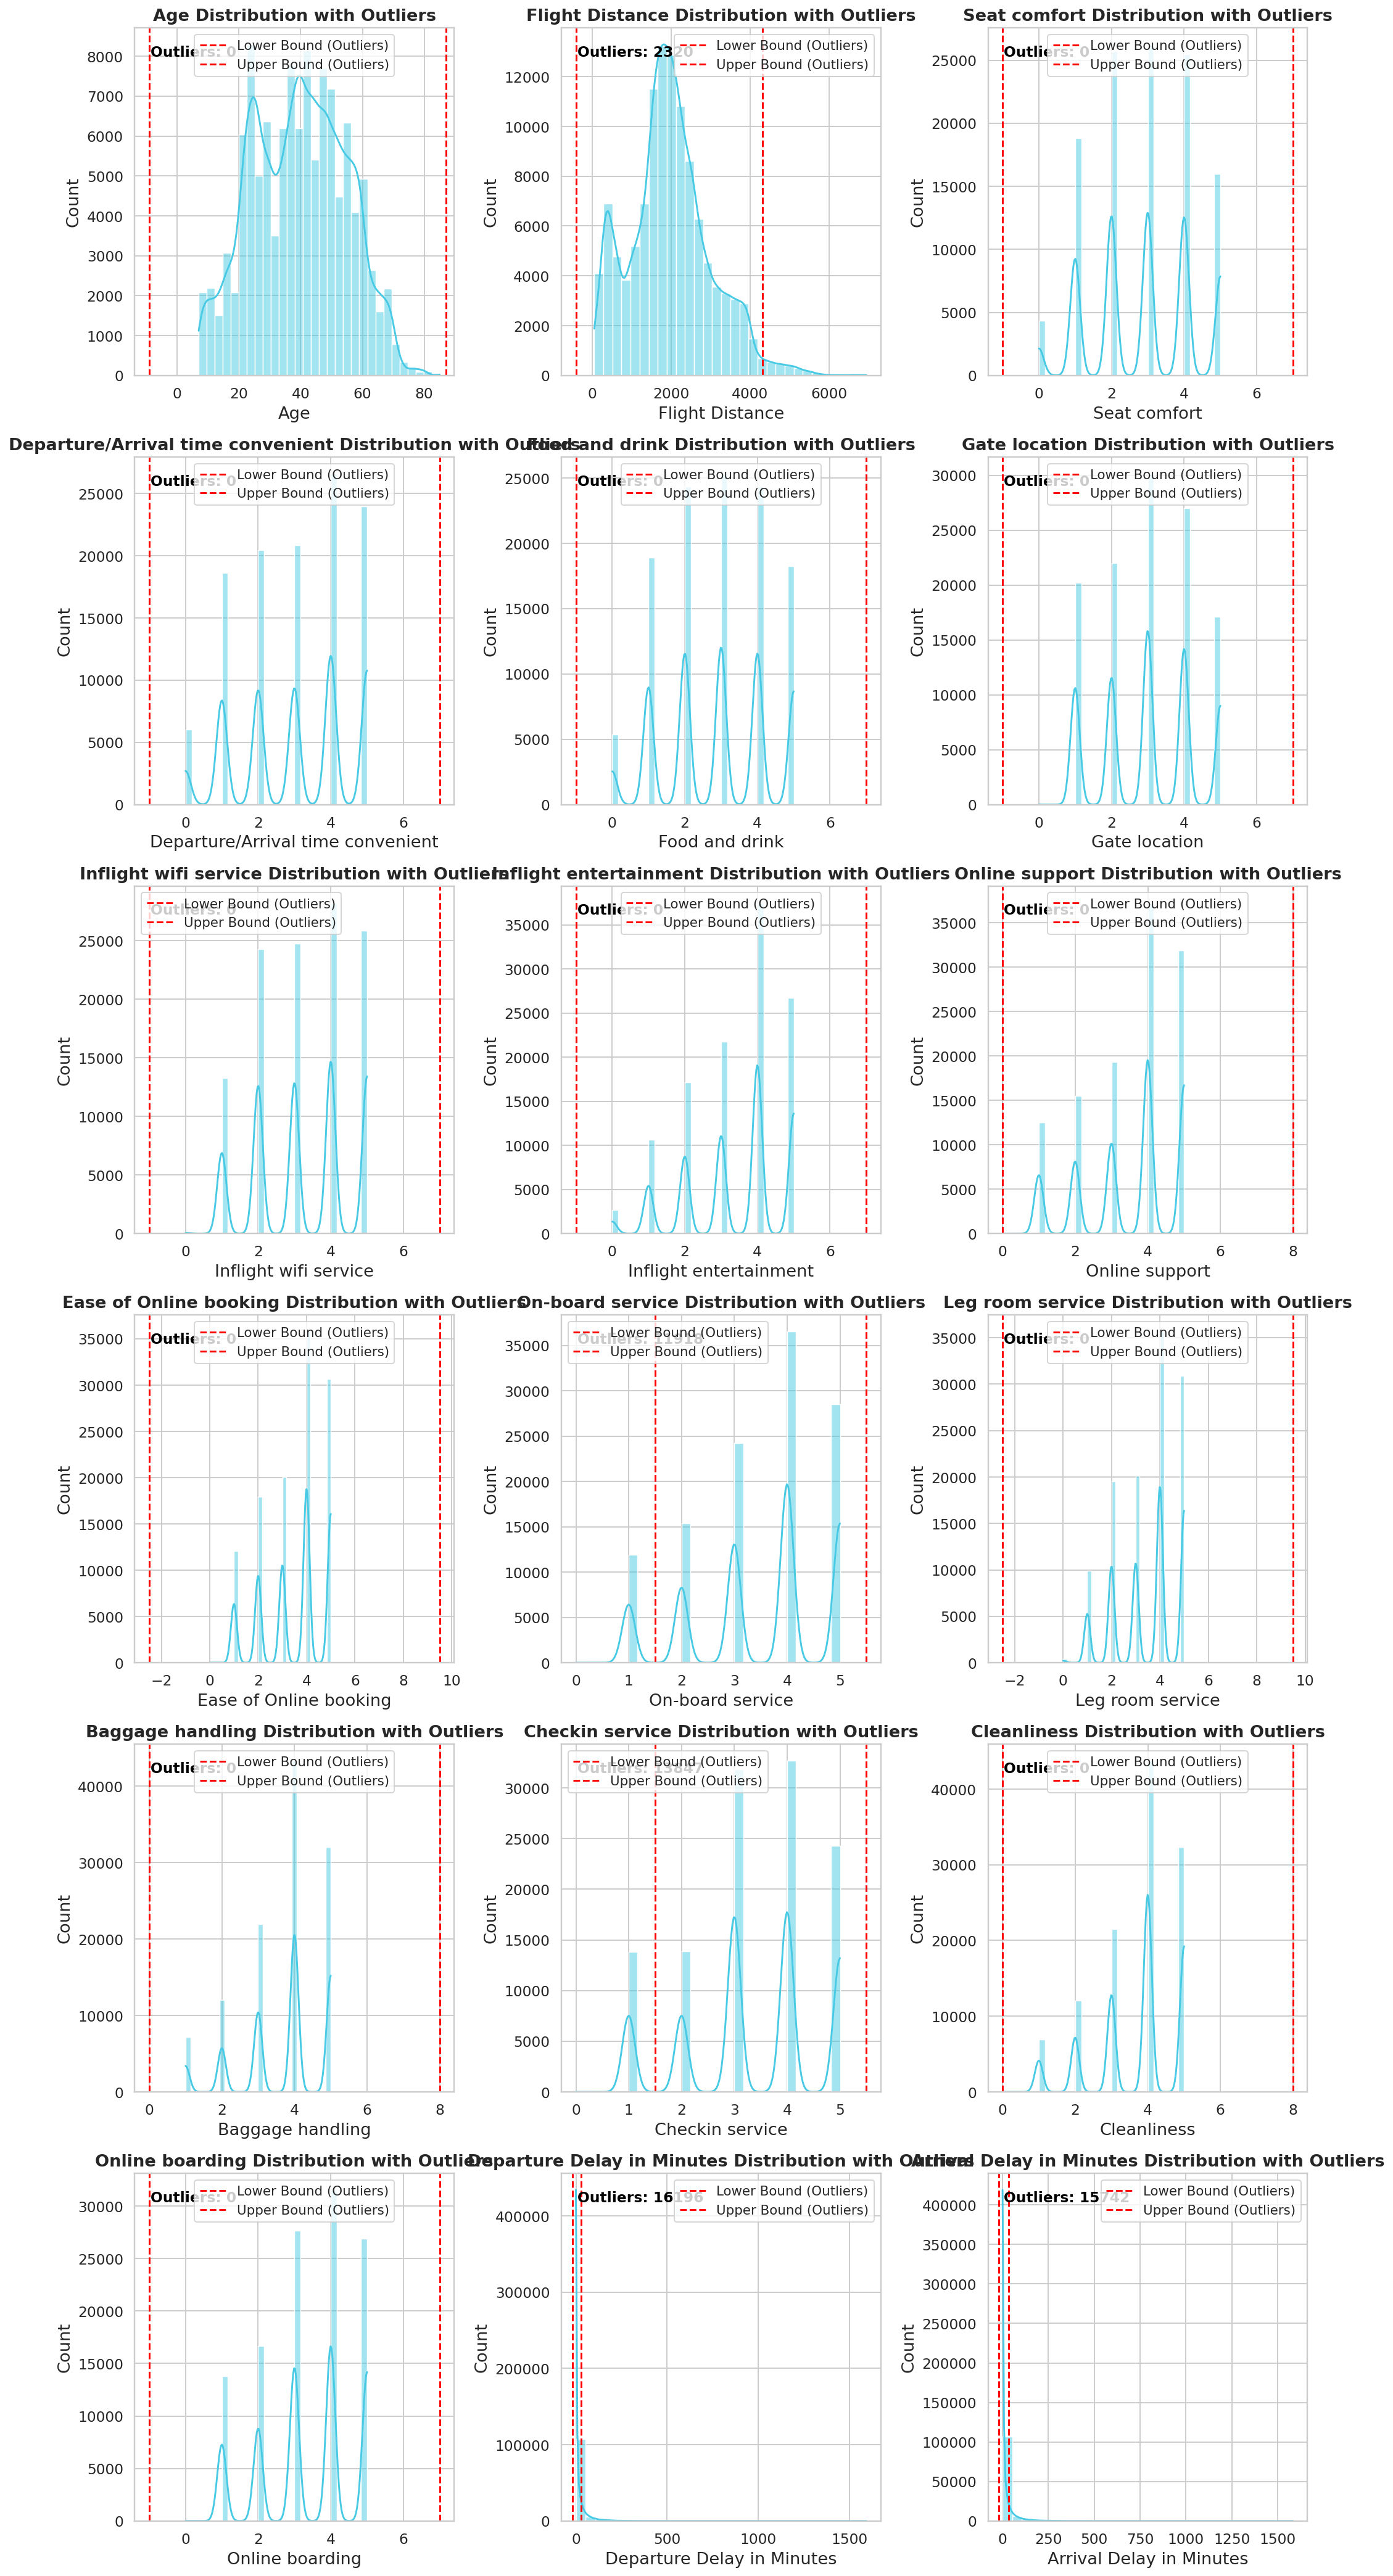

Number of outliers in Age: 0
Number of outliers in Flight Distance: 2320
Number of outliers in Seat comfort: 0
Number of outliers in Departure/Arrival time convenient: 0
Number of outliers in Food and drink: 0
Number of outliers in Gate location: 0
Number of outliers in Inflight wifi service: 0
Number of outliers in Inflight entertainment: 0
Number of outliers in Online support: 0
Number of outliers in Ease of Online booking: 0
Number of outliers in On-board service: 11918
Number of outliers in Leg room service: 0
Number of outliers in Baggage handling: 0
Number of outliers in Checkin service: 13847
Number of outliers in Cleanliness: 0
Number of outliers in Online boarding: 0
Number of outliers in Departure Delay in Minutes: 16196
Number of outliers in Arrival Delay in Minutes: 15742


In [15]:
def count_outliers(df):
    outlier_counts = {}
    
    # Set up the figure and grid layout for subplots
    num_numeric_cols = len(df.select_dtypes(include=['number']).columns)
    nrows = int(np.ceil(num_numeric_cols / 3))  # 3 subplots per row
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each numeric column
    for i, col in enumerate(df.select_dtypes(include=['number']).columns):
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]  # Number of outliers
        
        # Plot the distribution of the column with sns.histplot
        sns.histplot(df[col], bins=30, kde=True, color="#48cae4", ax=axes[i])
        axes[i].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (Outliers)')
        axes[i].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (Outliers)')
        axes[i].set_title(f'{col} Distribution with Outliers', fontsize=14, fontweight='bold')
        axes[i].legend()
        
        # Annotate the number of outliers on the plot
        axes[i].text(0.05, 0.95, f'Outliers: {outlier_counts[col]}', transform=axes[i].transAxes,
                     fontsize=12, verticalalignment='top', color='black', fontweight='bold')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
    return outlier_counts

# Get the number of outliers in each numeric column
outlier_counts = count_outliers(df)

# Print the number of outliers for each column
for col, count in outlier_counts.items():
    print(f'Number of outliers in {col}: {count}')

# Demographic Analysis
- How does satisfaction vary across different age groups?
- Is there a significant difference in satisfaction between genders?
- Does the combination of age and gender reveal any interesting patterns in satisfaction?
- How does the customer type (loyal vs non-loyal) impact satisfaction across demographics?

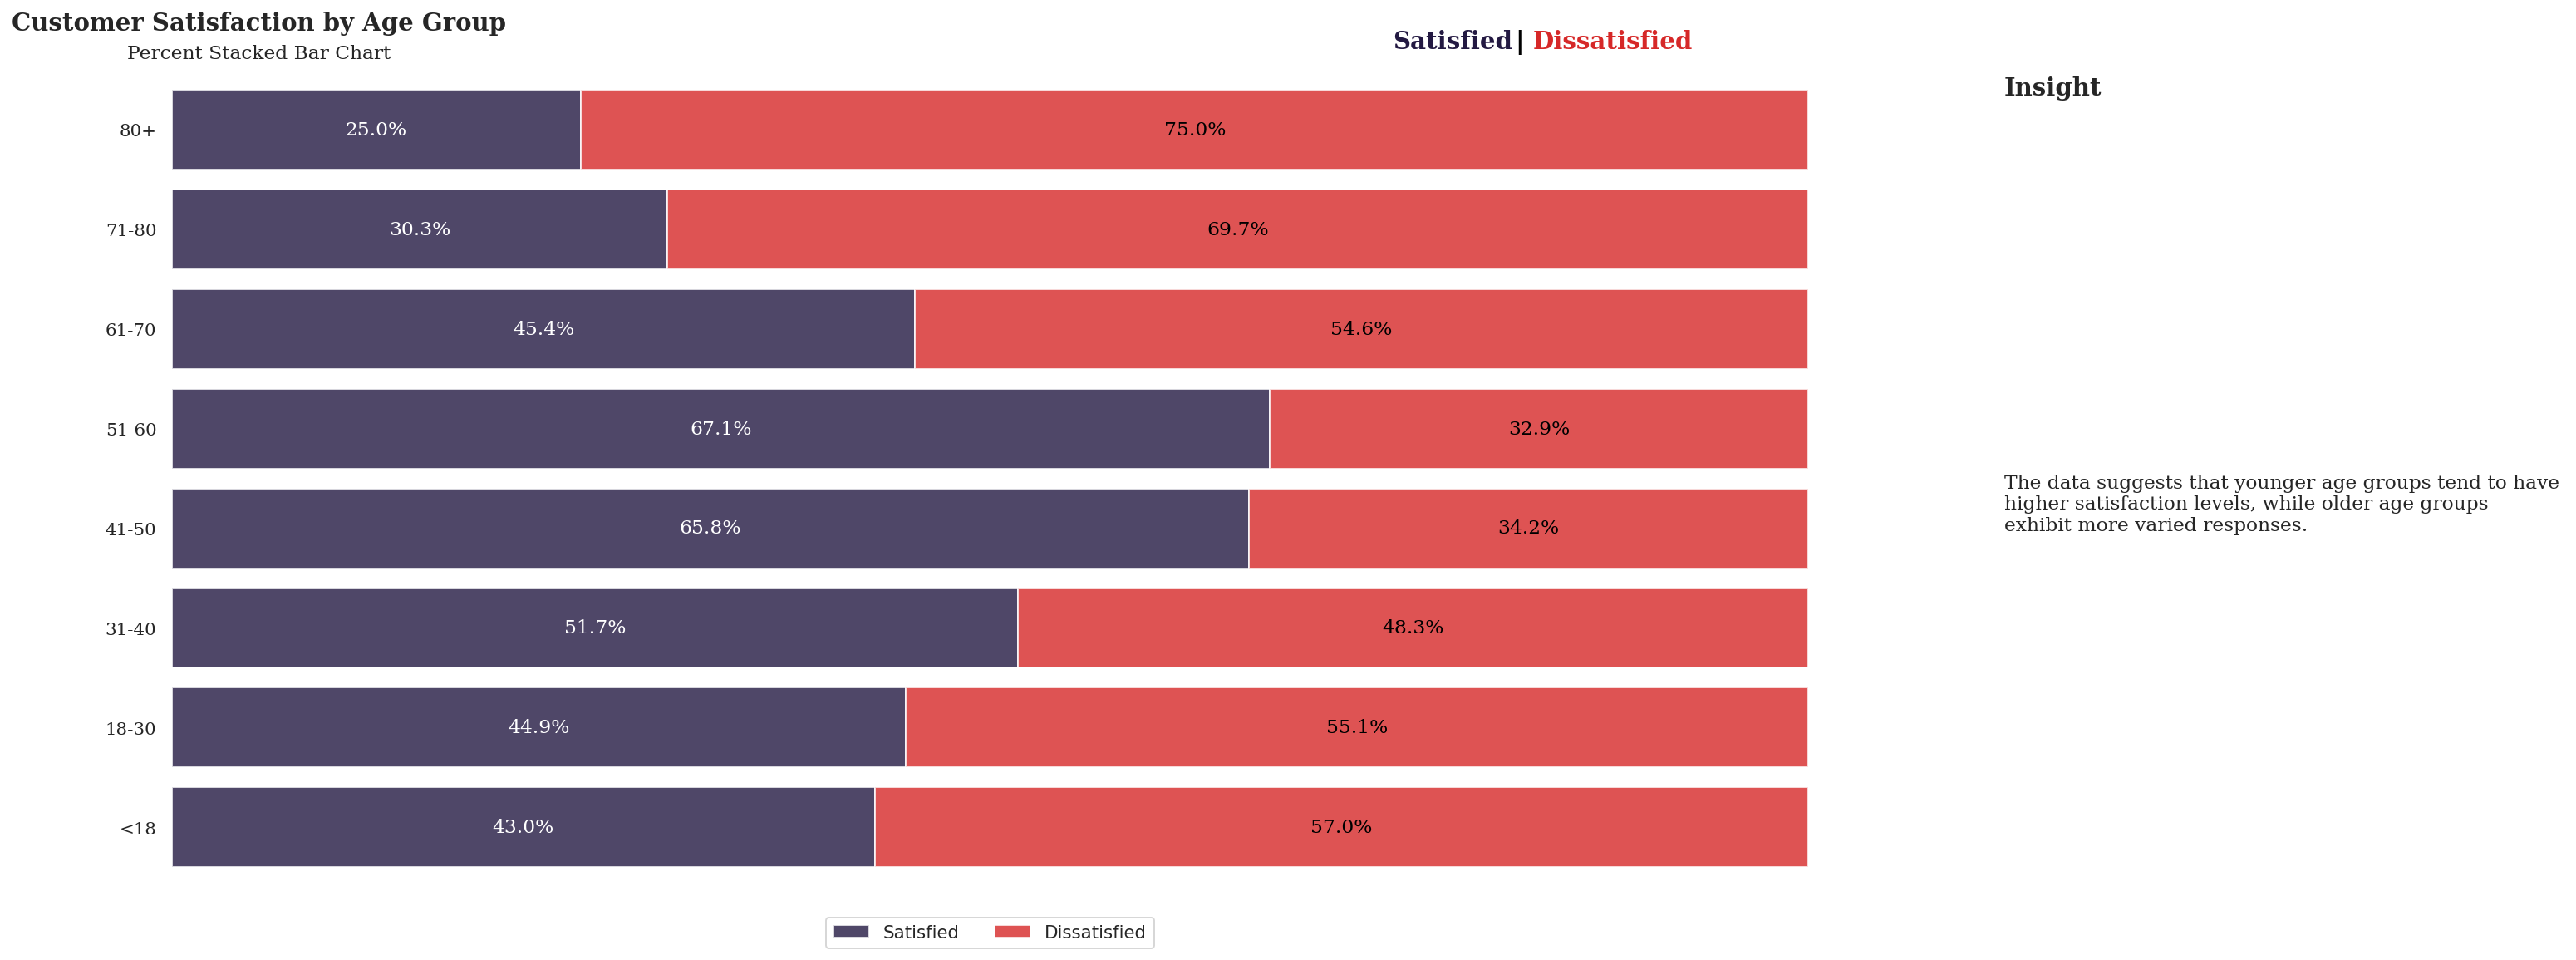

In [16]:
# Categorize Age into bins
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate satisfaction rates for each age group
satisfaction_by_age = df.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack().fillna(0)

# Select the top age groups based on the satisfaction rate
top_age_groups = satisfaction_by_age.sum(axis=1).nlargest(8).index
data = satisfaction_by_age.loc[top_age_groups]

# Plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting Satisfied and Dissatisfied
ax.barh(data.index, data['satisfied'], color=custom_color[2], alpha=0.8, label='Satisfied')
ax.barh(data.index, data['dissatisfied'], left=data['satisfied'], color=custom_color[0], alpha=0.8, label='Dissatisfied')

# Formatting the plot
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data.index, fontfamily='serif', fontsize=11)

# Add annotations
for i in data.index:
    ax.annotate(f"{data['satisfied'][i]*100:.1f}%", 
                xy=(data['satisfied'][i]/2, i),
                va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif', color='white')

    ax.annotate(f"{data['dissatisfied'][i]*100:.1f}%", 
                xy=(data['satisfied'][i] + data['dissatisfied'][i]/2, i),
                va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif', color='black')

# Title and text with proper alignment
fig.text(0.1, 1, 'Customer Satisfaction by Age Group', fontsize=15, fontweight='bold', fontfamily='serif', ha='center')   
fig.text(0.1, 0.97, 'Percent Stacked Bar Chart', fontsize=12, fontfamily='serif', ha='center')   

# Hide spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Add legend
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.06))

# Insight text
fig.text(0.75, 0.98, "Satisfied", fontweight="bold", fontfamily='serif', fontsize=15, color=custom_color[2])
fig.text(0.82, 0.98, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.83, 0.98, "Dissatisfied", fontweight="bold", fontfamily='serif', fontsize=15, color=custom_color[0])

fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
The data suggests that younger age groups tend to have 
higher satisfaction levels, while older age groups 
exhibit more varied responses.
''', fontsize=12, fontweight='light', fontfamily='serif')
plt.grid(False)
plt.tight_layout()
plt.show()

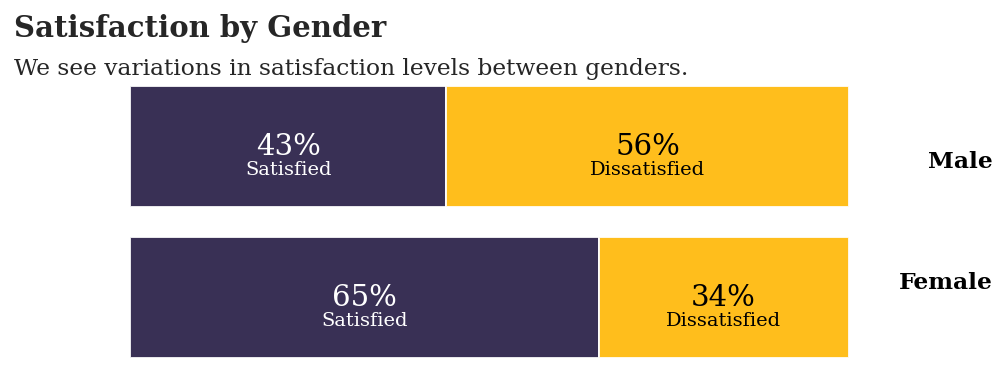

In [17]:
satisfaction_by_gender = df.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

# Create horizontal stacked bar chart
ax.barh(satisfaction_by_gender.index, satisfaction_by_gender['satisfied'], 
        color=custom_color[2], alpha=0.9, label='Satisfied')
ax.barh(satisfaction_by_gender.index, satisfaction_by_gender['dissatisfied'], 
        left=satisfaction_by_gender['satisfied'], 
        color=custom_color[1], alpha=0.9, label='Dissatisfied')

# Formatting
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Annotating the percentages with labels for "Satisfied" and "Dissatisfied"
for i in satisfaction_by_gender.index:
    # For Satisfied
    ax.annotate(f"{int(satisfaction_by_gender['satisfied'][i] * 100)}%", 
                xy=(satisfaction_by_gender['satisfied'][i] / 2, i),
                va='center', ha='center', fontsize=15, fontweight='light', 
                fontfamily='serif', color='white')
    
    ax.annotate("Satisfied", 
                xy=(satisfaction_by_gender['satisfied'][i] / 2, satisfaction_by_gender.index.get_loc(i) - 0.15),
                va='center', ha='center', fontsize=10, fontweight='light', 
                fontfamily='serif', color='white')

    # For Dissatisfied
    ax.annotate(f"{int(satisfaction_by_gender['dissatisfied'][i] * 100)}%", 
                xy=(satisfaction_by_gender['satisfied'][i] + satisfaction_by_gender['dissatisfied'][i] / 2, i),
                va='center', ha='center', fontsize=15, fontweight='light', 
                fontfamily='serif', color='black')

    ax.annotate("Dissatisfied", 
                xy=(satisfaction_by_gender['satisfied'][i] + satisfaction_by_gender['dissatisfied'][i] / 2, satisfaction_by_gender.index.get_loc(i) - 0.15),
                va='center', ha='center', fontsize=10, fontweight='light', 
                fontfamily='serif', color='black')

ax.text(1.2, 0.9, 'Male', fontsize=12, fontweight='bold', color='black', va='center', ha='right', fontfamily='serif')
ax.text(1.2, 0.1, 'Female', fontsize=12, fontweight='bold', color='black', va='center', ha='right', fontfamily='serif')

# Title & Subtitle
fig.text(-0.1, 1.03, 'Satisfaction by Gender', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(-0.1, 0.92, 'We see variations in satisfaction levels between genders.', fontfamily='serif', fontsize=12)

# Hide spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

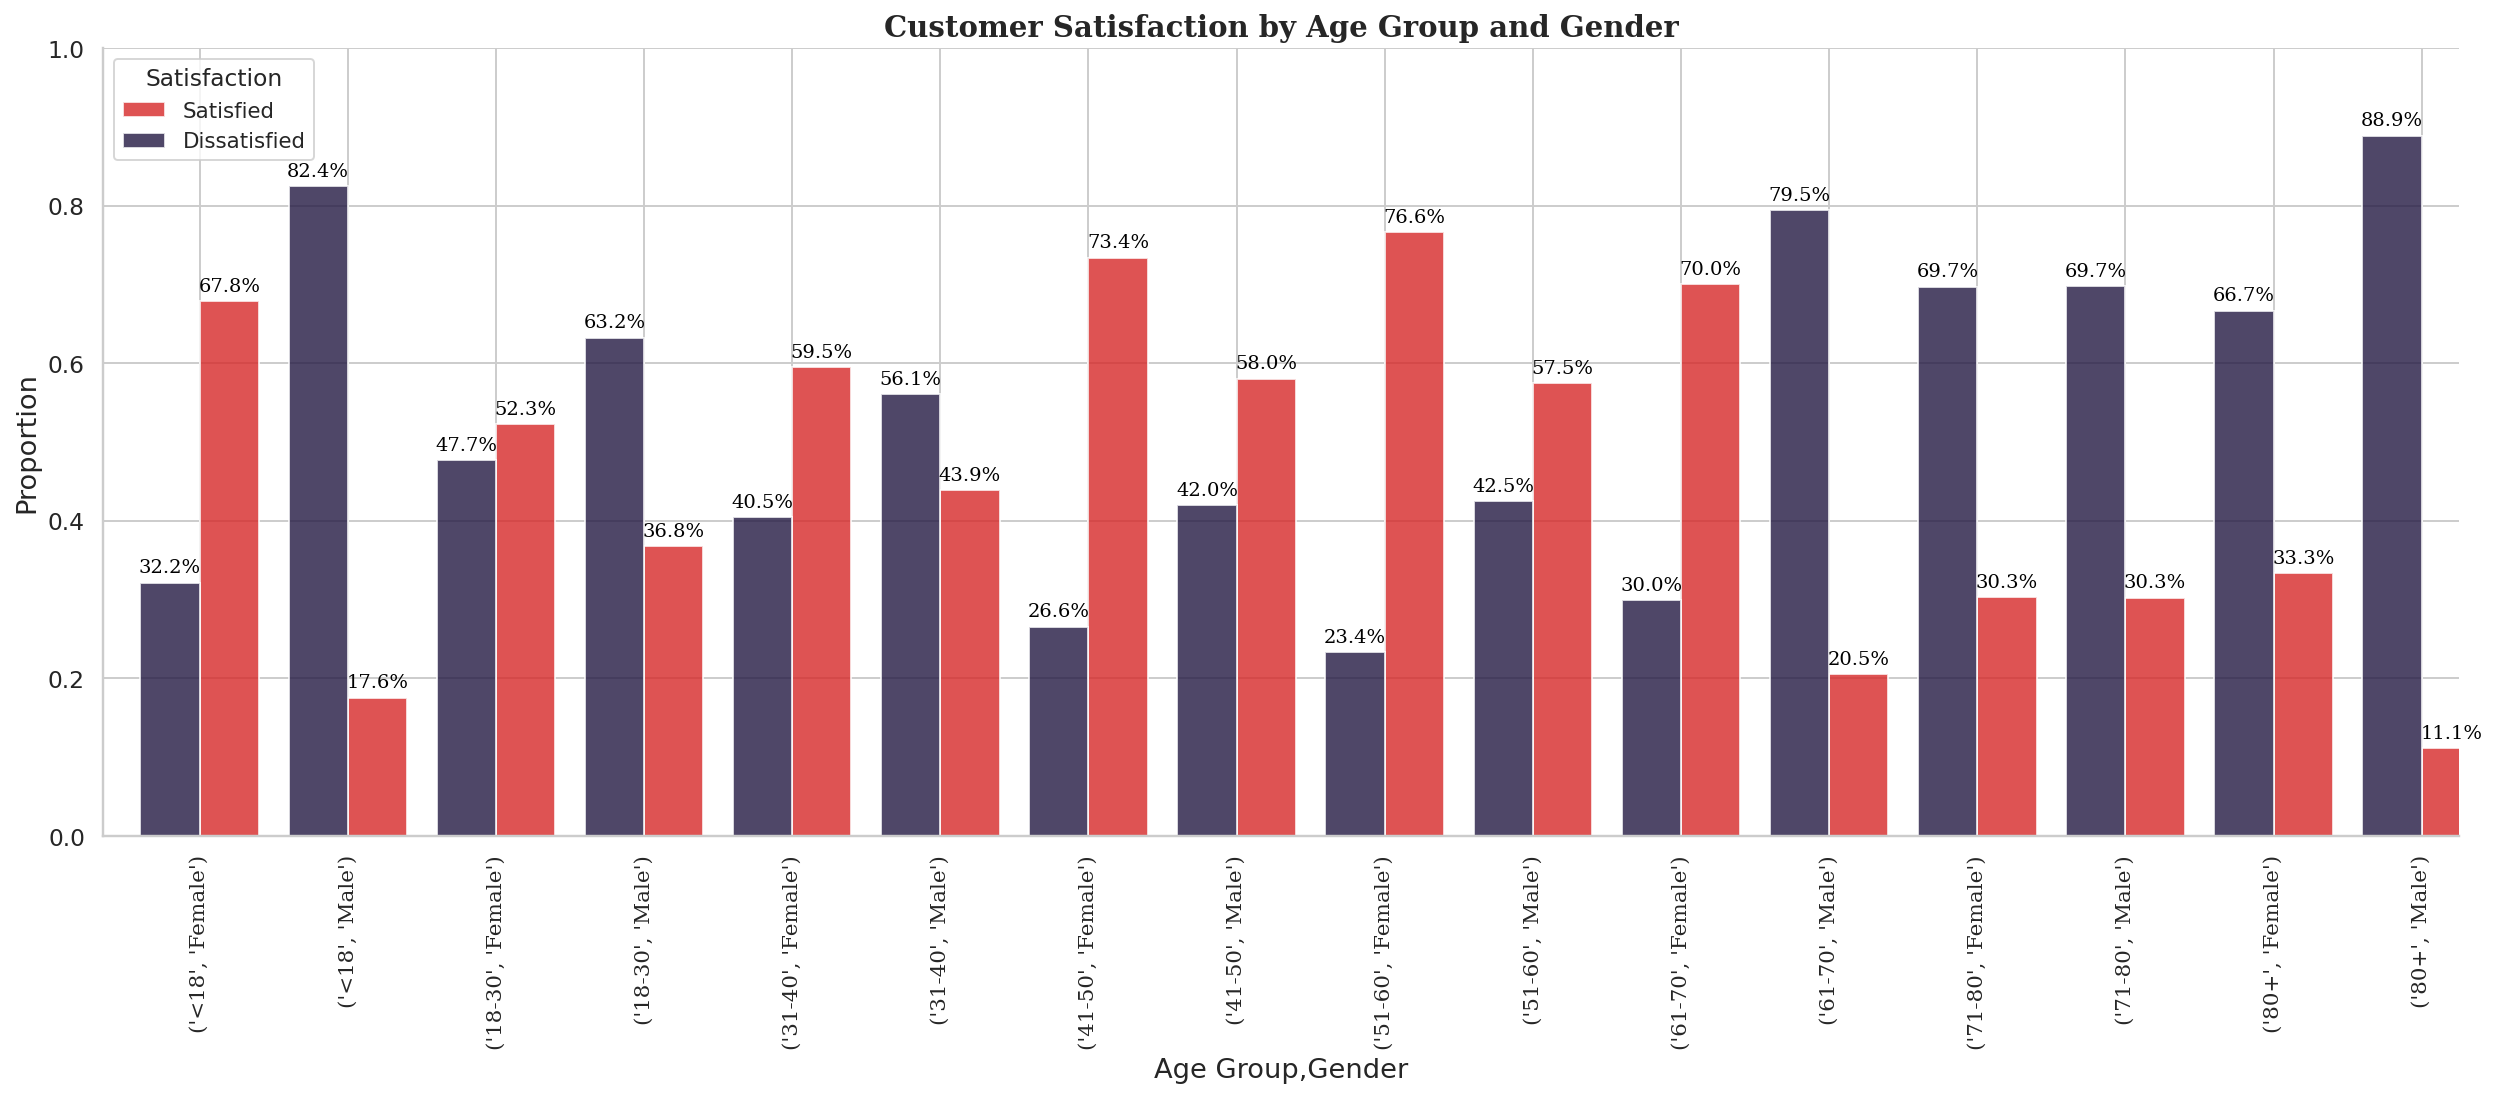

In [18]:
# Calculate satisfaction rates for each combination of age group and gender
satisfaction_by_age_gender = df.groupby(['Age Group', 'Gender'])['satisfaction'].value_counts(normalize=True).unstack().fillna(0)
data = satisfaction_by_age_gender

# Plot
fig, ax = plt.subplots(figsize=(18, 8))

# Plotting Satisfied and Dissatisfied
data['satisfied'].plot(kind='bar', color=custom_color[0], alpha=0.8, ax=ax, position=0, width=0.4, label='Satisfied')
data['dissatisfied'].plot(kind='bar', color=custom_color[2], alpha=0.8, ax=ax, position=1, width=0.4, label='Dissatisfied')

# Formatting the plot
ax.set_ylabel('Proportion')
ax.set_title('Customer Satisfaction by Age Group and Gender', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_xticklabels(data.index, fontfamily='serif', fontsize=11)
ax.set_ylim(0, 1)
ax.legend(title='Satisfaction')

# Add annotations
for i in range(len(data)):
    satisfied_value = data['satisfied'].iloc[i]
    dissatisfied_value = data['dissatisfied'].iloc[i]
    
    # Calculate percentages
    satisfied_percent = satisfied_value * 100
    dissatisfied_percent = dissatisfied_value * 100
    
    # Annotate for Satisfied (position at the top of the bar)
    ax.annotate(f"{satisfied_percent:.1f}%", 
                xy=(i + 0.2, satisfied_value),  # Use satisfied_value for the y-coordinate
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                va='bottom', ha='center', fontsize=10, fontweight='normal', fontfamily='serif', color='black')
    
    # Annotate for Dissatisfied (position at the top of the bar)
    ax.annotate(f"{dissatisfied_percent:.1f}%", 
                xy=(i - 0.2, dissatisfied_value),  # Use dissatisfied_value for the y-coordinate
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                va='bottom', ha='center', fontsize=10, fontweight='normal', fontfamily='serif', color='black')

# Hide spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

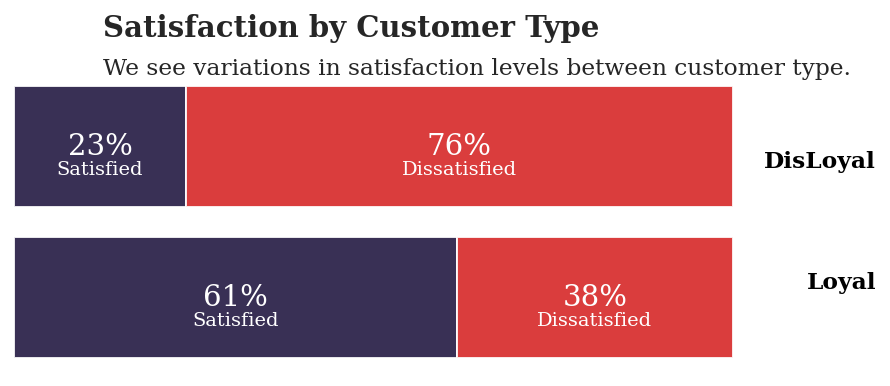

In [19]:
satisfaction_by_customer_type = df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

# Create horizontal stacked bar chart
ax.barh(satisfaction_by_customer_type.index, satisfaction_by_customer_type['satisfied'], 
        color=custom_color[2], alpha=0.9, label='Satisfied')
ax.barh(satisfaction_by_customer_type.index, satisfaction_by_customer_type['dissatisfied'], 
        left=satisfaction_by_customer_type['satisfied'], 
        color=custom_color[0], alpha=0.9, label='Dissatisfied')

# Formatting
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Annotating the percentages with labels for "Satisfied" and "Dissatisfied"
for i in satisfaction_by_customer_type.index:
    # For Satisfied
    ax.annotate(f"{int(satisfaction_by_customer_type['satisfied'][i] * 100)}%", 
                xy=(satisfaction_by_customer_type['satisfied'][i] / 2, i),
                va='center', ha='center', fontsize=15, fontweight='light', 
                fontfamily='serif', color='white')
    
    ax.annotate("Satisfied", 
                xy=(satisfaction_by_customer_type['satisfied'][i] / 2, satisfaction_by_customer_type.index.get_loc(i) - 0.15),
                va='center', ha='center', fontsize=10, fontweight='light', 
                fontfamily='serif', color='white')

    # For Dissatisfied
    ax.annotate(f"{int(satisfaction_by_customer_type['dissatisfied'][i] * 100)}%", 
                xy=(satisfaction_by_customer_type['satisfied'][i] + satisfaction_by_customer_type['dissatisfied'][i] / 2, i),
                va='center', ha='center', fontsize=15, fontweight='light', 
                fontfamily='serif', color='white')

    ax.annotate("Dissatisfied", 
                xy=(satisfaction_by_customer_type['satisfied'][i] + satisfaction_by_customer_type['dissatisfied'][i] / 2, satisfaction_by_customer_type.index.get_loc(i) - 0.15),
                va='center', ha='center', fontsize=10, fontweight='light', 
                fontfamily='serif', color='white')

# Adding color labels 
ax.text(1.2, 0.9, 'DisLoyal', fontsize=12, fontweight='bold', color='black', va='center', ha='right', fontfamily='serif')
ax.text(1.2, 0.1, 'Loyal', fontsize=12, fontweight='bold', color='black', va='center', ha='right', fontfamily='serif')

# Title & Subtitle
fig.text(0.125, 1.03, 'Satisfaction by Customer Type', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.92, 'We see variations in satisfaction levels between customer type.', fontfamily='serif', fontsize=12)

# Hide spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

# Travel Characteristics Analysis
- How does the type of travel (business vs personal) correlate with satisfaction?
- Is there a significant difference in satisfaction across different flight classes?
- What is the relationship between flight distance and customer satisfaction?
- How do different combinations of travel type and class affect satisfaction?
- How do departure and arrival delays impact satisfaction?

In [20]:
satisfaction_by_travel_type = df.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_travel_type

satisfaction     dissatisfied  satisfied
Type of Travel                          
Business travel      0.416654   0.583346
Personal Travel      0.532962   0.467038

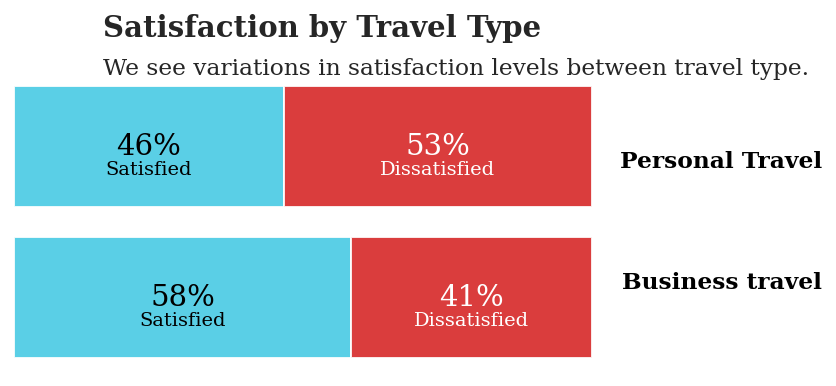

In [21]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

# Create horizontal stacked bar chart
ax.barh(satisfaction_by_travel_type.index, satisfaction_by_travel_type['satisfied'], 
        color=custom_color[3], alpha=0.9, label='Satisfied')
ax.barh(satisfaction_by_travel_type.index, satisfaction_by_travel_type['dissatisfied'], 
        left=satisfaction_by_travel_type['satisfied'], 
        color=custom_color[0], alpha=0.9, label='Dissatisfied')

# Formatting
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Annotating the percentages with labels for "Satisfied" and "Dissatisfied"
for i in satisfaction_by_travel_type.index:
    # For Satisfied
    ax.annotate(f"{int(satisfaction_by_travel_type['satisfied'][i] * 100)}%", 
                xy=(satisfaction_by_travel_type['satisfied'][i] / 2, i),
                va='center', ha='center', fontsize=15, fontweight='light', 
                fontfamily='serif', color='black')
    
    ax.annotate("Satisfied", 
                xy=(satisfaction_by_travel_type['satisfied'][i] / 2, satisfaction_by_travel_type.index.get_loc(i) - 0.15),
                va='center', ha='center', fontsize=10, fontweight='light', 
                fontfamily='serif', color='black')

    # For Dissatisfied
    ax.annotate(f"{int(satisfaction_by_travel_type['dissatisfied'][i] * 100)}%", 
                xy=(satisfaction_by_travel_type['satisfied'][i] + satisfaction_by_travel_type['dissatisfied'][i] / 2, i),
                va='center', ha='center', fontsize=15, fontweight='light', 
                fontfamily='serif', color='white')

    ax.annotate("Dissatisfied", 
                xy=(satisfaction_by_travel_type['satisfied'][i] + satisfaction_by_travel_type['dissatisfied'][i] / 2, satisfaction_by_travel_type.index.get_loc(i) - 0.15),
                va='center', ha='center', fontsize=10, fontweight='light', 
                fontfamily='serif', color='white')

# Adding color labels 
ax.text(1.4, 0.9, 'Personal Travel', fontsize=12, fontweight='bold', color='black', va='center', ha='right', fontfamily='serif')
ax.text(1.4, 0.1, 'Business travel', fontsize=12, fontweight='bold', color='black', va='center', ha='right', fontfamily='serif')

# Title & Subtitle
fig.text(0.125, 1.03, 'Satisfaction by Travel Type', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.92, 'We see variations in satisfaction levels between travel type.', fontfamily='serif', fontsize=12)

# Hide spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

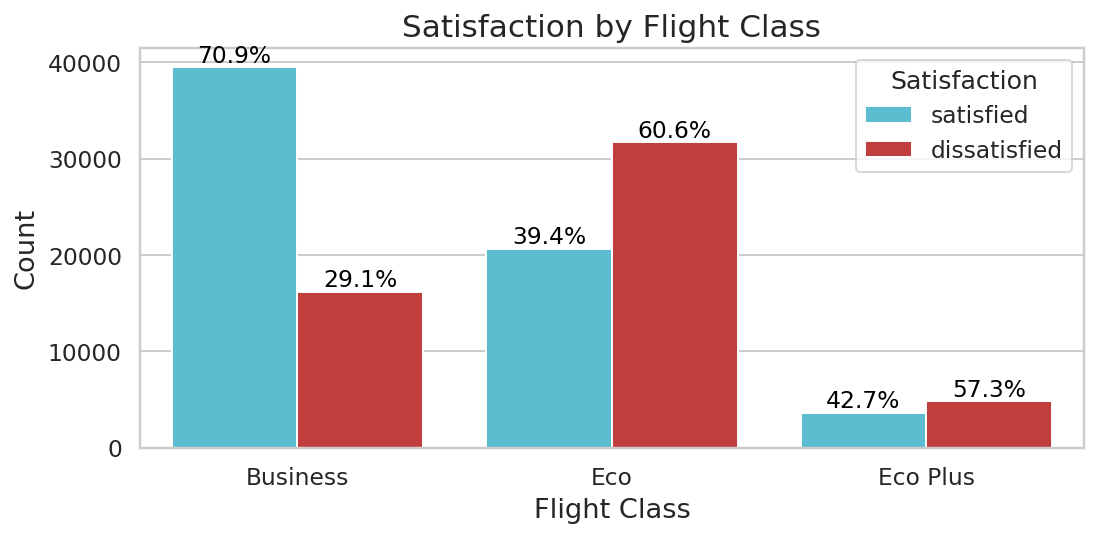

In [22]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Convert 'Class' to a categorical type if it isn't already
df['Class'] = pd.Categorical(df['Class'])

# Create the countplot
ax = sns.countplot(data=df, x='Class', hue='satisfaction', palette=['#48cae4', '#d62828'])

# Add title and labels
plt.title('Satisfaction by Flight Class', fontsize=16)
plt.xlabel('Flight Class', fontsize=14)
plt.ylabel('Count', fontsize=14)  # Changed to 'Count' as we will calculate percentage in annotations

# Improve tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Satisfaction', fontsize=12, title_fontsize='13')

# Calculate the total counts for each class
total_counts = df['Class'].value_counts()

# Annotate each bar with its percentage
for p in ax.patches:
    # Get the height of the bar (count)
    height = p.get_height()
    # Get the x-coordinate of the bar's position
    x_pos = p.get_x() + p.get_width() / 2
    # Get the class label for the current bar
    class_label = df['Class'].cat.categories[int(p.get_x() + 0.5)]
    # Get the satisfaction level for the current bar (from hue)
    satisfaction_label = p.get_facecolor()  # This assumes color coding for satisfaction

    # Calculate the total counts for the current class and satisfaction level
    total_count_for_class = total_counts[class_label]
    
    # Calculate the percentage
    percentage = (height / total_count_for_class) * 100

    # Annotate with the percentage
    ax.annotate(f'{percentage:.1f}%', 
                (x_pos, height), 
                ha='center', va='bottom', 
                fontsize=12, 
                color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the annotations
plt.show()

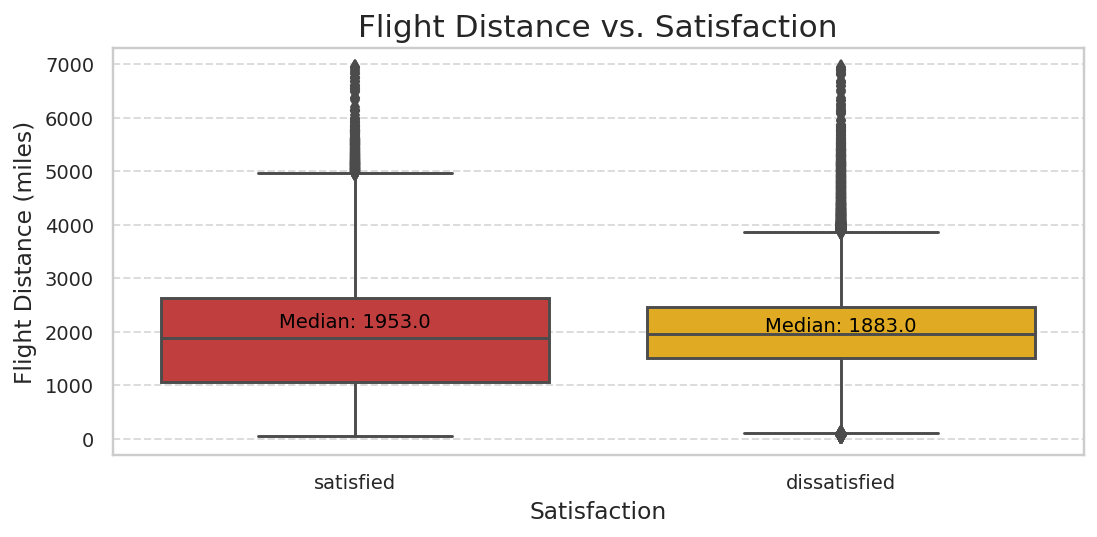

In [23]:
plt.figure(figsize=(8, 4))

# Create the box plot
sns.boxplot(data=df, x='satisfaction', y='Flight Distance', palette=custom_color)

# Add title and labels
plt.title('Flight Distance vs. Satisfaction', fontsize=16)
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Flight Distance (miles)', fontsize=12)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate and annotate median values
medians = df.groupby('satisfaction')['Flight Distance'].median()
for i, median in enumerate(medians):
    plt.text(i, median + 50, f'Median: {median:.1f}', 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             color='black', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

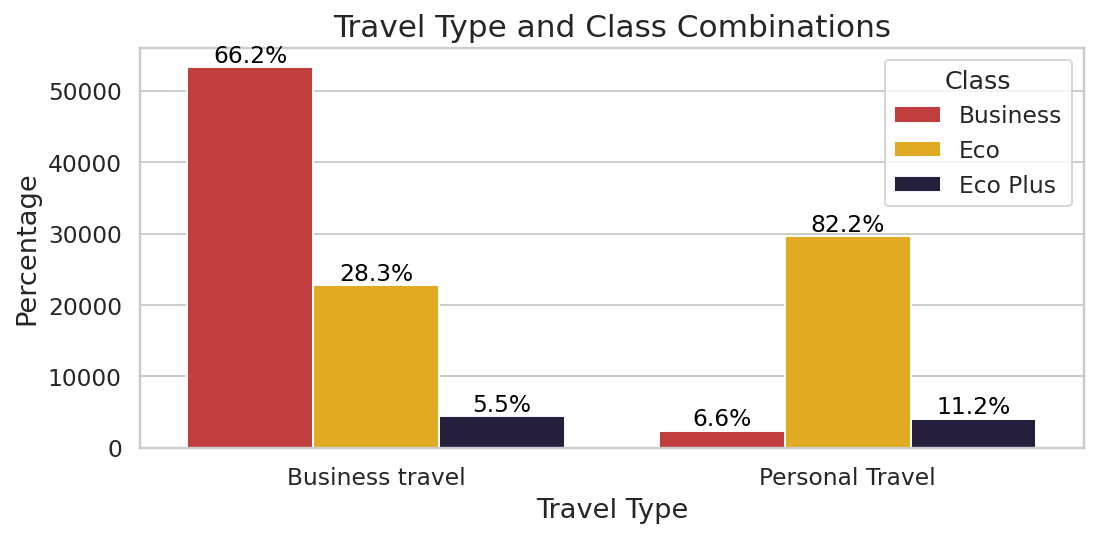

In [24]:
# Convert 'Type of Travel' to a categorical type if it isn't already
df['Type of Travel'] = df['Type of Travel'].astype('category')

# Set the figure size
plt.figure(figsize=(8, 4))

# Create the countplot
ax = sns.countplot(data=df, x='Type of Travel', hue='Class', palette=custom_color)

# Add title and labels
plt.title('Travel Type and Class Combinations', fontsize=16)
plt.xlabel('Travel Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Improve tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Class', fontsize=12, title_fontsize='13')

# Calculate total counts for each travel type
total_counts_by_type = df['Type of Travel'].value_counts()

# Annotate each bar with its percentage
for p in ax.patches:
    # Get the height of the bar (count)
    height = p.get_height()
    # Get the x-coordinate of the bar's position
    x_pos = p.get_x() + p.get_width() / 2
    # Get the travel type for the current bar
    travel_type_index = int(p.get_x() + 0.5)  # Get the index of the travel type
    travel_type = df['Type of Travel'].cat.categories[travel_type_index]  # Get the category
    # Calculate the percentage
    percentage = (height / total_counts_by_type[travel_type]) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (x_pos, height), 
                ha='center', va='bottom', 
                fontsize=12, 
                color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the annotations
plt.show()

In [25]:
# Create a function to bin delays
def bin_delays(delay):
    if delay <= 0:
        return 'No Delay'
    elif delay <= 30:
        return '1-30 mins'
    elif delay <= 60:
        return '31-60 mins'
    else:
        return '60+ mins'

df['DepartureDelayBin'] = df['Departure Delay in Minutes'].apply(bin_delays)
df['ArrivalDelayBin'] = df['Arrival Delay in Minutes'].apply(bin_delays)

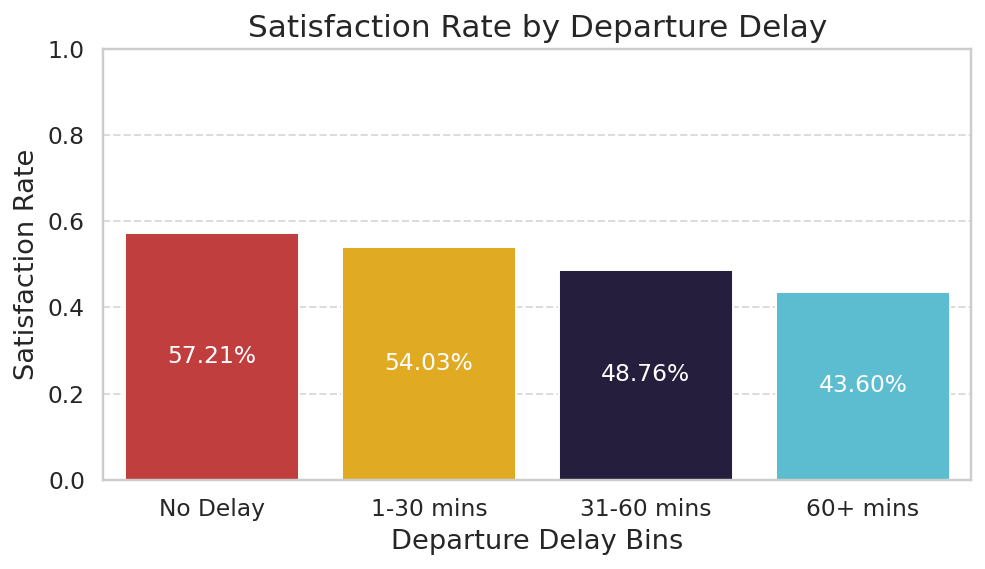

In [26]:
# Calculate satisfaction rate by departure delay bin
dep_delay_satisfaction = df.groupby('DepartureDelayBin')['satisfaction'].apply(lambda x: (x == 'satisfied').mean()).reset_index()

# Plot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='DepartureDelayBin', y='satisfaction', data=dep_delay_satisfaction, 
                       order=['No Delay', '1-30 mins', '31-60 mins', '60+ mins'], 
                       palette=custom_color)

# Add annotations to the bars (percentage in the middle)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2),  # Midpoint of each bar
                      ha='center', va='center', fontsize=12, color='white', 
                      xytext=(0, 0), textcoords='offset points')

plt.title('Satisfaction Rate by Departure Delay', fontsize=16)
plt.ylabel('Satisfaction Rate', fontsize=14)
plt.xlabel('Departure Delay Bins', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits to display percentages clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

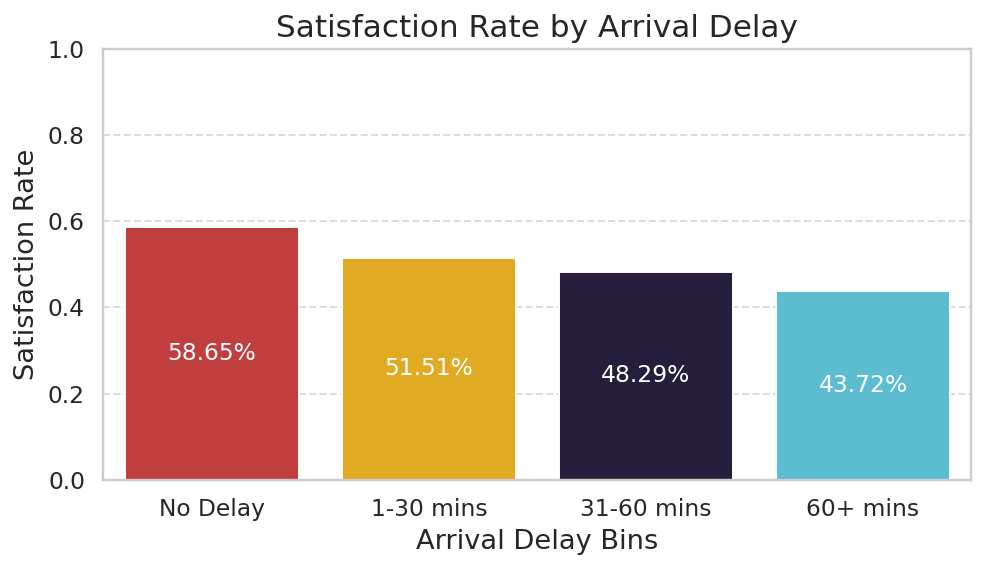

In [27]:
# Calculate satisfaction rate by arrival delay bin
arr_delay_satisfaction = df.groupby('ArrivalDelayBin')['satisfaction'].apply(lambda x: (x == 'satisfied').mean()).reset_index()

# Plot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='ArrivalDelayBin', y='satisfaction', data=arr_delay_satisfaction, 
                       order=['No Delay', '1-30 mins', '31-60 mins', '60+ mins'], 
                       palette=custom_color)

# Add annotations to the bars (percentage in the middle)
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height / 2),  # Midpoint of each bar
                      ha='center', va='center', fontsize=12, color='white', 
                      xytext=(0, 0), textcoords='offset points')

plt.title('Satisfaction Rate by Arrival Delay', fontsize=16)
plt.ylabel('Satisfaction Rate', fontsize=14)
plt.xlabel('Arrival Delay Bins', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits to display percentages clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Service Quality Analysis
- Which service factors have the strongest correlation with overall satisfaction?
- How do in-flight services (entertainment, wifi, food) compare to ground services (check-in, online booking) in terms of impact on satisfaction?
- Is there a hierarchy of importance among different service aspects?
- How does the impact of various services differ across customer segments?

satisfaction_num                     1.000000
Inflight entertainment               0.521975
Ease of Online booking               0.431721
Online support                       0.389112
On-board service                     0.351867
Online boarding                      0.337992
Leg room service                     0.304044
Checkin service                      0.266464
Baggage handling                     0.258813
Cleanliness                          0.258576
Seat comfort                         0.241720
Inflight wifi service                0.227239
Food and drink                       0.120099
Gate location                       -0.012219
Departure/Arrival time convenient   -0.016228
Name: satisfaction_num, dtype: float64


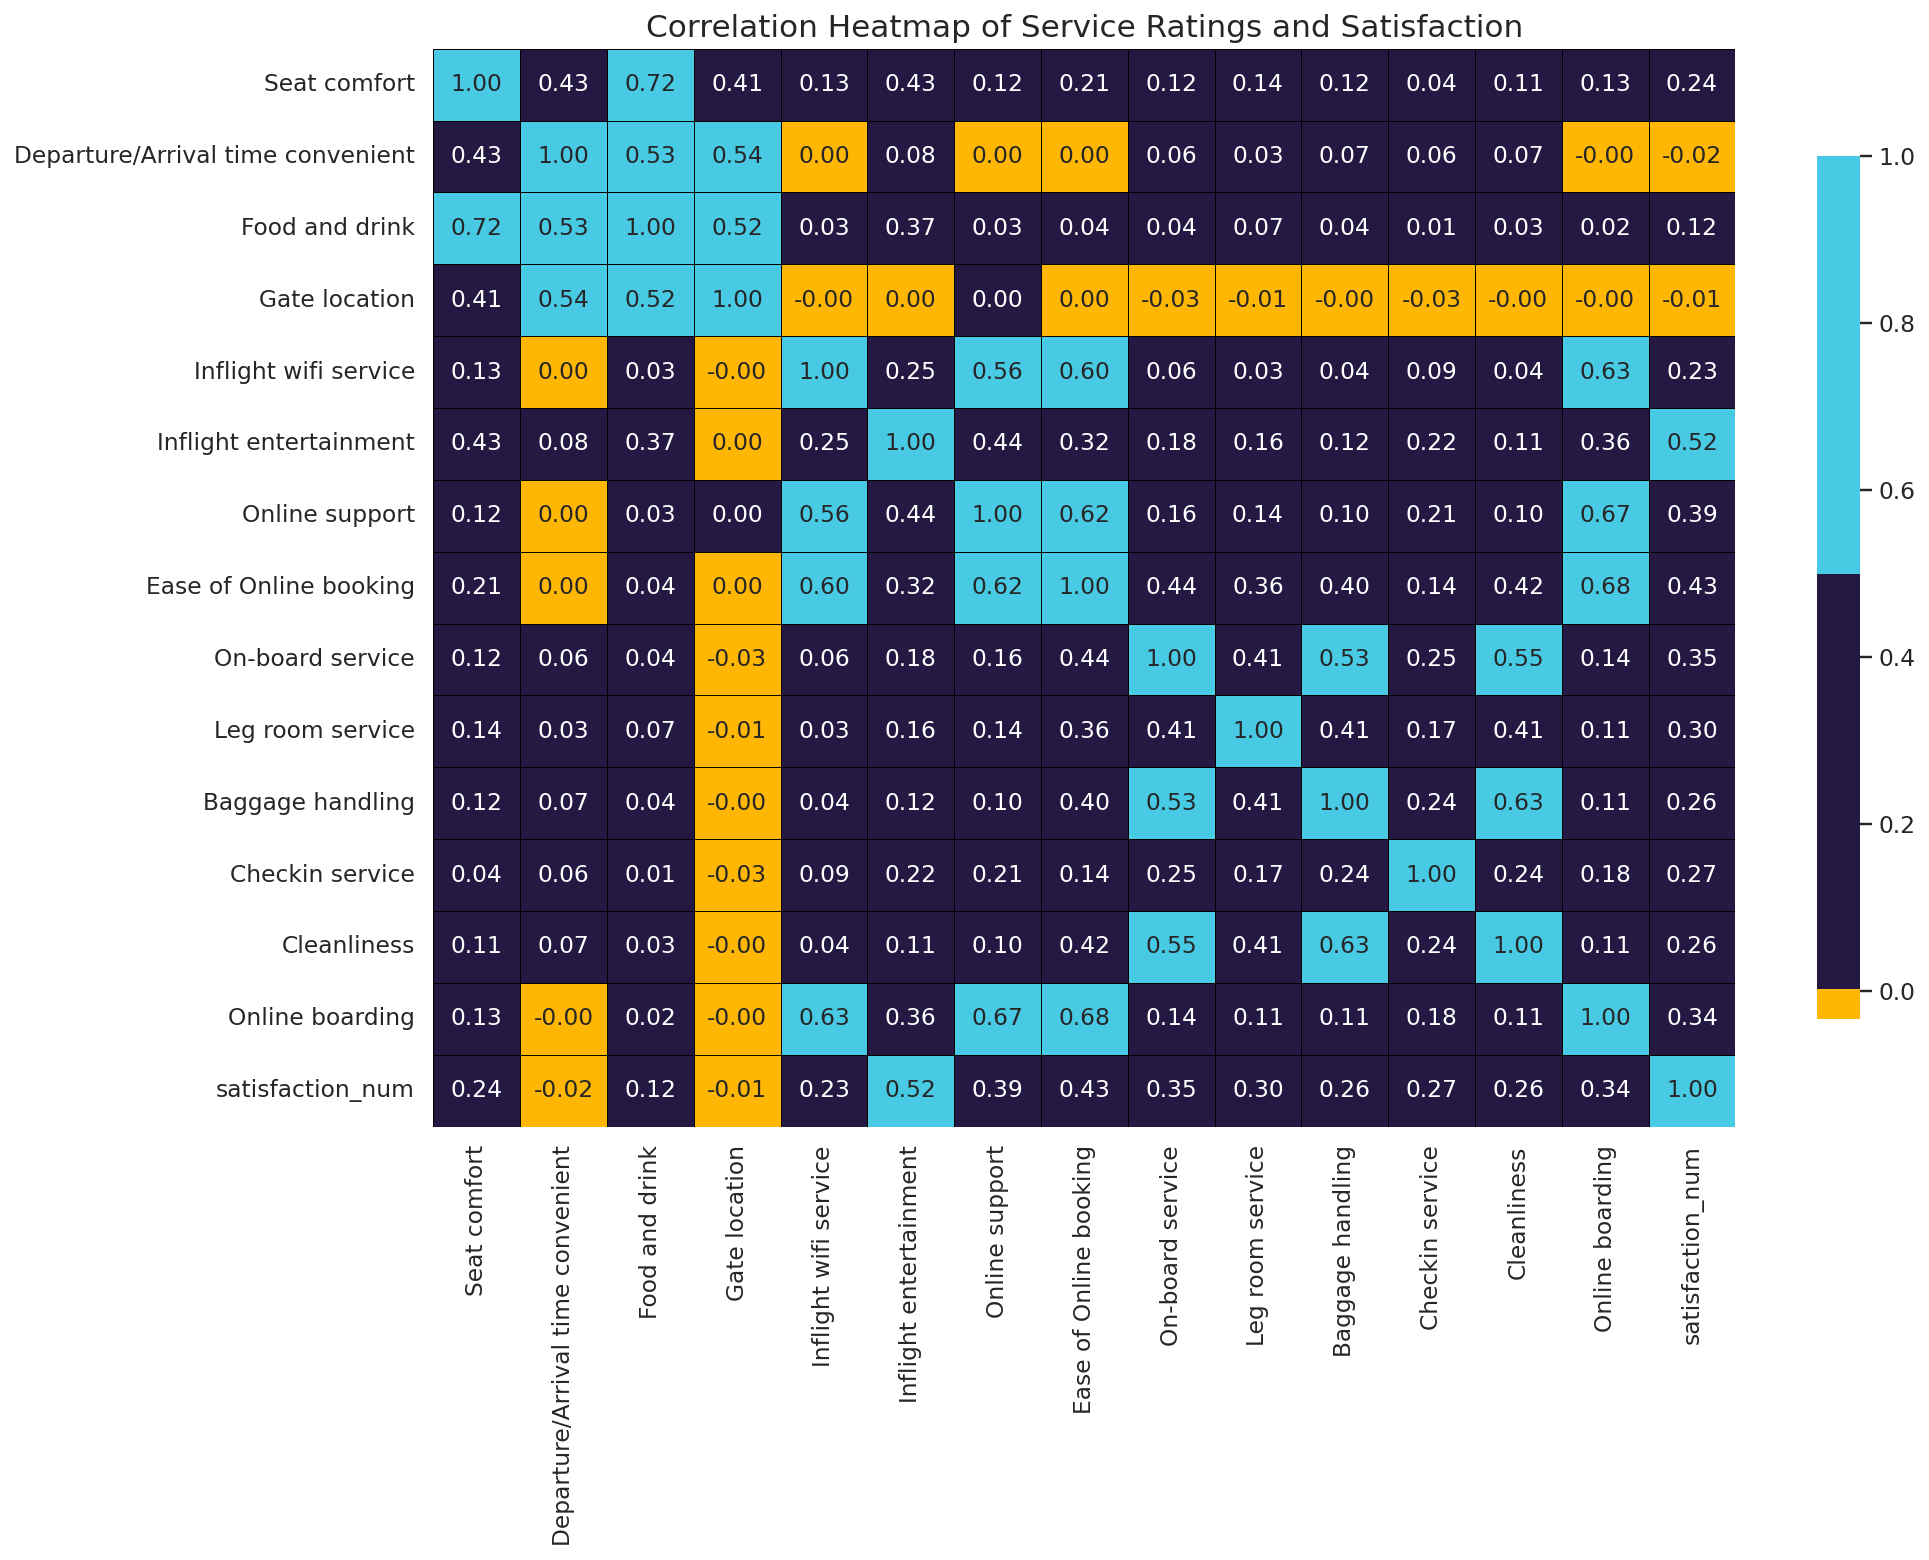

In [28]:
# Encoding service columns
service_columns = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 
                   'Gate location', 'Inflight wifi service', 'Inflight entertainment', 
                   'Online support', 'Ease of Online booking', 'On-board service', 
                   'Leg room service', 'Baggage handling', 'Checkin service', 
                   'Cleanliness', 'Online boarding']

# Assuming the ratings are categorical strings from 1-5, you can use LabelEncoder
for column in service_columns:
    # If your ratings are already in numeric format, you can skip this step
    df[column] = df[column].astype(int)  # Ensure the column is in integer format

# Encode the target variable 'satisfaction' to numeric values if not done yet
df['satisfaction_num'] = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

corr = df[service_columns + ['satisfaction_num']].corr()
# Get correlations with satisfaction
satisfaction_correlation = corr['satisfaction_num'].sort_values(ascending=False)

# Display the correlation results
print(satisfaction_correlation)
# Create a custom colormap from the defined palette
cmap = sns.color_palette(custom_color, as_cmap=True)

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            annot=True, 
            cmap=cmap, 
            fmt='.2f',
           center=0,  # Center the colormap at 0 for better readability
            linewidths=.5,  # Add lines between cells for clarity
            linecolor='black',  # Color of the lines
            cbar_kws={"shrink": .8}  # Adjust the color bar size
        )
plt.title('Correlation Heatmap of Service Ratings and Satisfaction')
plt.show()

### 1. **Focus on High-Impact Services**:
   - **Inflight Entertainment (0.52)**: This service has the highest positive correlation with satisfaction. Consider enhancing the quality, variety, and accessibility of entertainment options.
   - **Ease of Online Booking (0.43)**: A significant positive correlation indicates that simplifying the booking process could lead to higher satisfaction. Look into user experience (UX) improvements on your booking platform.
   - **Online Support (0.39)**: Since online support is also correlated positively, investing in effective online customer support can significantly enhance satisfaction. This could involve chatbots, improved FAQ sections, or increased availability of customer service representatives.

### 2. **Improve Service Quality**:
   - **On-board Service (0.35)**: Since this is a major factor, assess the quality of your onboard service, including staff training and service protocols.
   - **Online Boarding (0.34)** and **Leg Room Service (0.30)**: These are also significant contributors. Enhancing the boarding experience and ensuring adequate legroom can lead to better customer satisfaction.

### 3. **Operational Efficiency**:
   - **Check-in Service (0.27)** and **Baggage Handling (0.26)**: Improving these services can help reduce negative experiences during the travel process. Streamlining check-in processes and optimizing baggage handling can lead to fewer complaints.

### 4. **Enhance Cleanliness and Comfort**:
   - **Cleanliness (0.26)** and **Seat Comfort (0.24)**: Both factors are important for customer satisfaction. Regular maintenance and cleanliness checks, along with improving seating comfort, should be prioritized.

### 5. **Monitor and Address Lower Impact Factors**:
   - **Inflight Wifi Service (0.23)**: Although it has a positive correlation, it’s less impactful than other services. Evaluate the cost versus the benefit of enhancing wifi service.
   - **Food and Drink (0.12)**: This has the lowest positive correlation. While still relevant, it may not be a priority unless it’s part of a broader improvement strategy.

### 6. **Investigate Negative Correlations**:
   - **Gate Location (-0.01)** and **Departure/Arrival Time Convenient (-0.02)**: These factors are negatively correlated with satisfaction, suggesting they might detract from the overall customer experience. Investigate if there are specific issues related to these factors and consider addressing them, possibly through better communication or logistics.

### 7. **Conduct Further Analysis**:
   - **Segmented Analysis**: Analyze how these correlations might differ across demographic groups (e.g., age, gender, customer type) to tailor your services effectively.
   - **Feedback Mechanism**: Establish or enhance feedback mechanisms to understand customer pain points related to these services.

### Conclusion
Focusing on improving the services that have the highest positive correlation with satisfaction while addressing the negative aspects can lead to a more satisfying customer experience. Additionally, continuous monitoring and adjusting based on customer feedback will be crucial in maintaining high satisfaction levels.

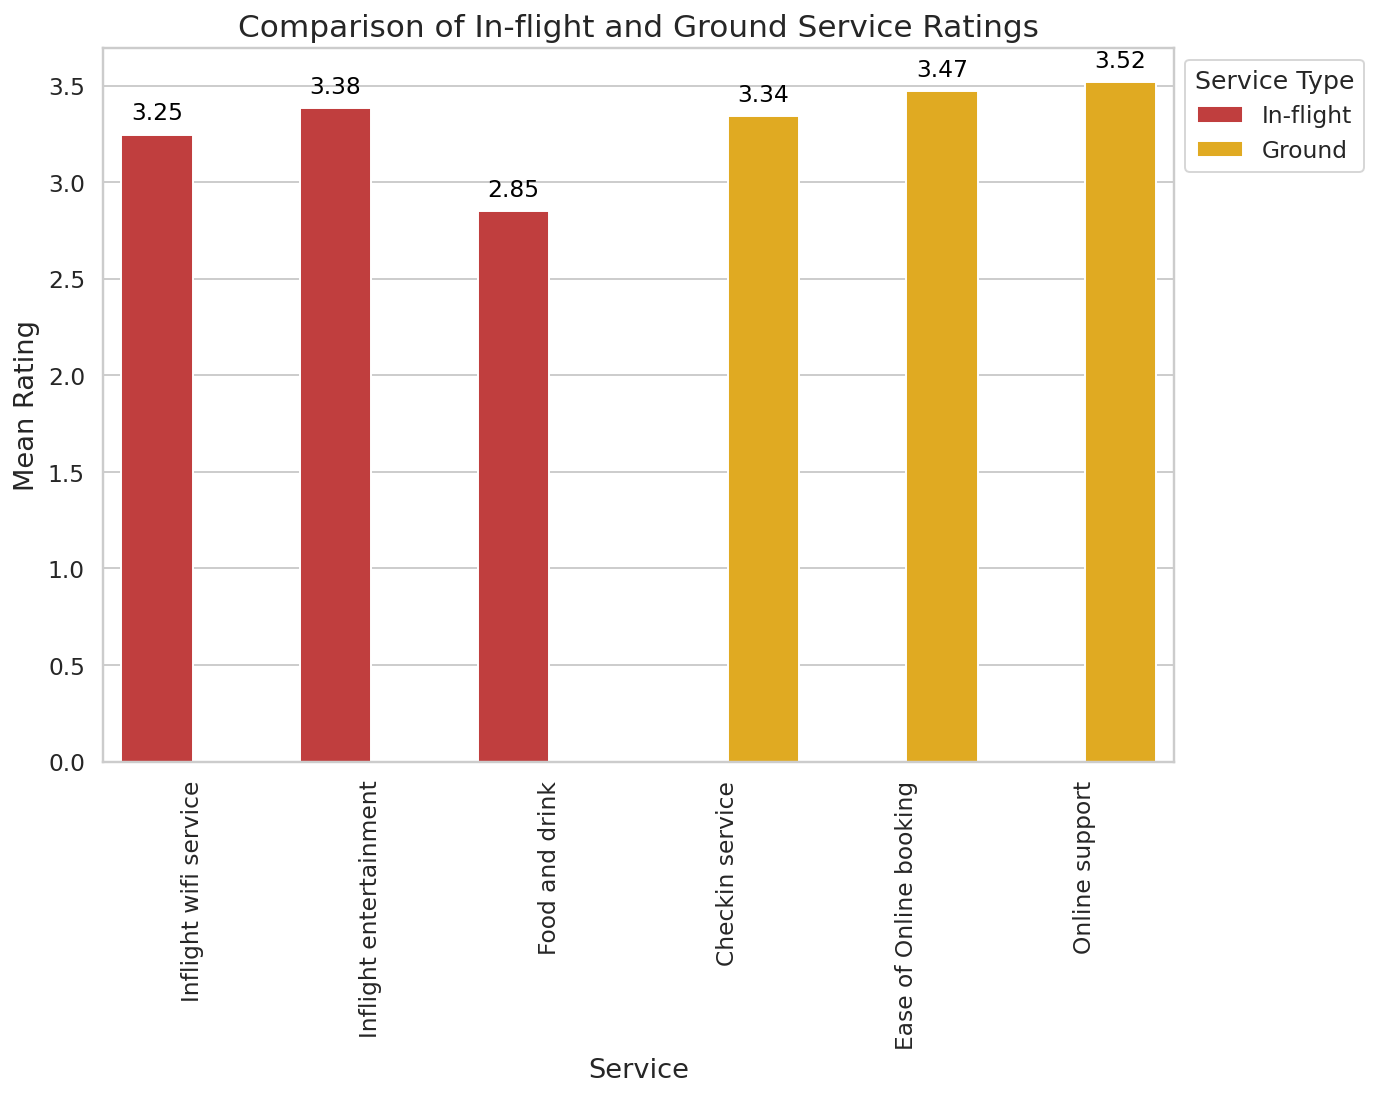

In [29]:
# Define in-flight and ground service columns
inflight_columns = ['Inflight wifi service', 'Inflight entertainment', 'Food and drink']
ground_columns = ['Checkin service', 'Ease of Online booking', 'Online support']

# Calculate mean satisfaction for in-flight and ground services
inflight_satisfaction = df[inflight_columns].mean().reset_index()
ground_satisfaction = df[ground_columns].mean().reset_index()

# Merge into a single DataFrame
service_comparison = pd.concat([inflight_satisfaction, ground_satisfaction], keys=['In-flight', 'Ground']).reset_index(level=0)
service_comparison.columns = ['Service Type', 'Service', 'Mean Rating']


# Plot comparison
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Service', y='Mean Rating', hue='Service Type', data=service_comparison, palette=custom_color)
plt.title('Comparison of In-flight and Ground Service Ratings', fontsize=16)
plt.ylabel('Mean Rating', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
# Improve legend aesthetics and move it
plt.legend(title='Service Type', fontsize=12, title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

# Add annotations
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black', 
                     xytext=(0, 5),  # Offset text by 5 pixels above the bar
                     textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

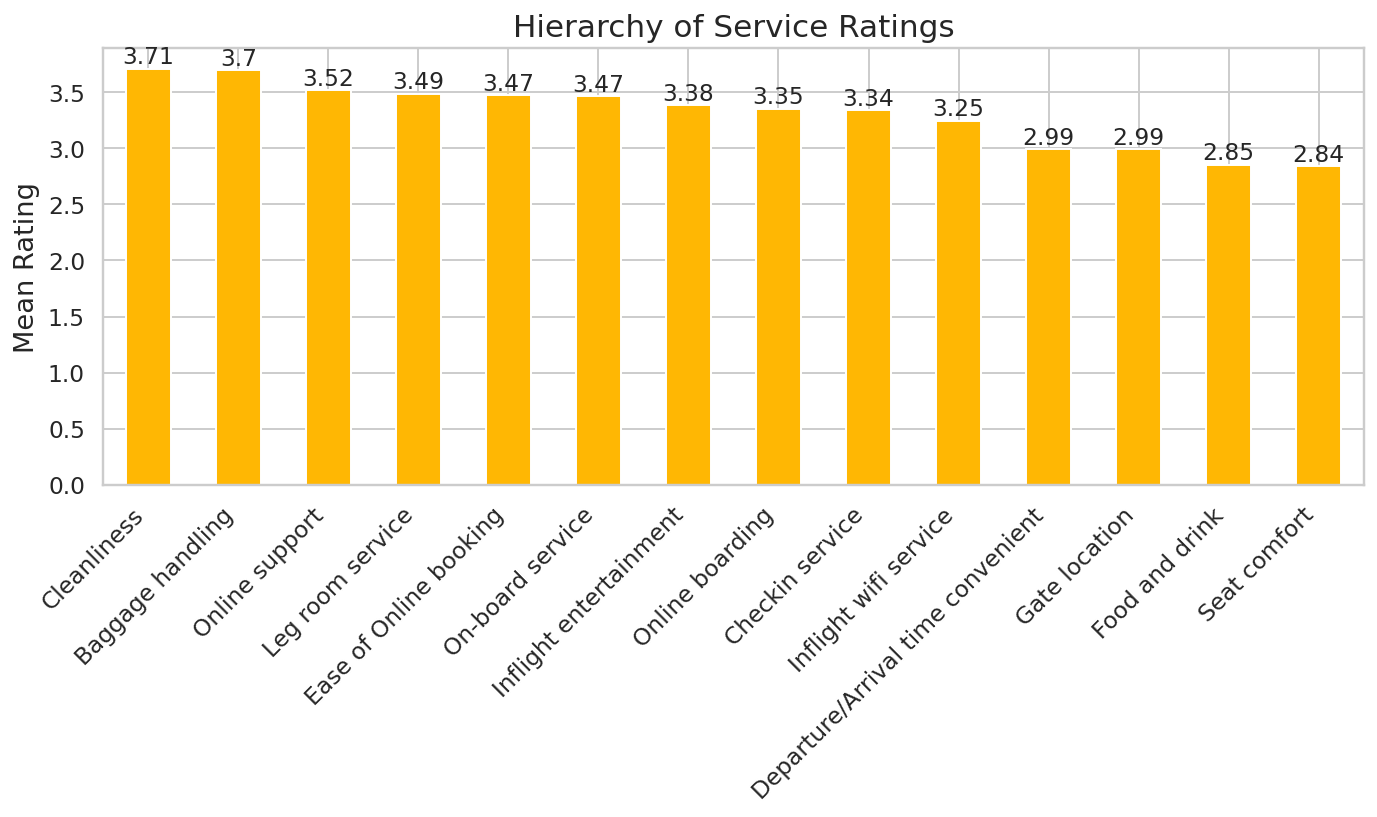

In [30]:
# Get the mean ratings for all services
mean_service_ratings = df[[ 
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 
    'Gate location', 'Inflight wifi service', 'Inflight entertainment', 
    'Online support', 'Ease of Online booking', 'On-board service', 
    'Leg room service', 'Baggage handling', 'Checkin service', 
    'Cleanliness', 'Online boarding'
]].mean().sort_values(ascending=False)

# Plot the hierarchy of service ratings
plt.figure(figsize=(10, 6))
bars = mean_service_ratings.plot(kind='bar', color=custom_color[1])

# Adding mean rating annotations
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             round(bar.get_height(), 2), 
             ha='center', 
             va='bottom')

plt.title('Hierarchy of Service Ratings')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

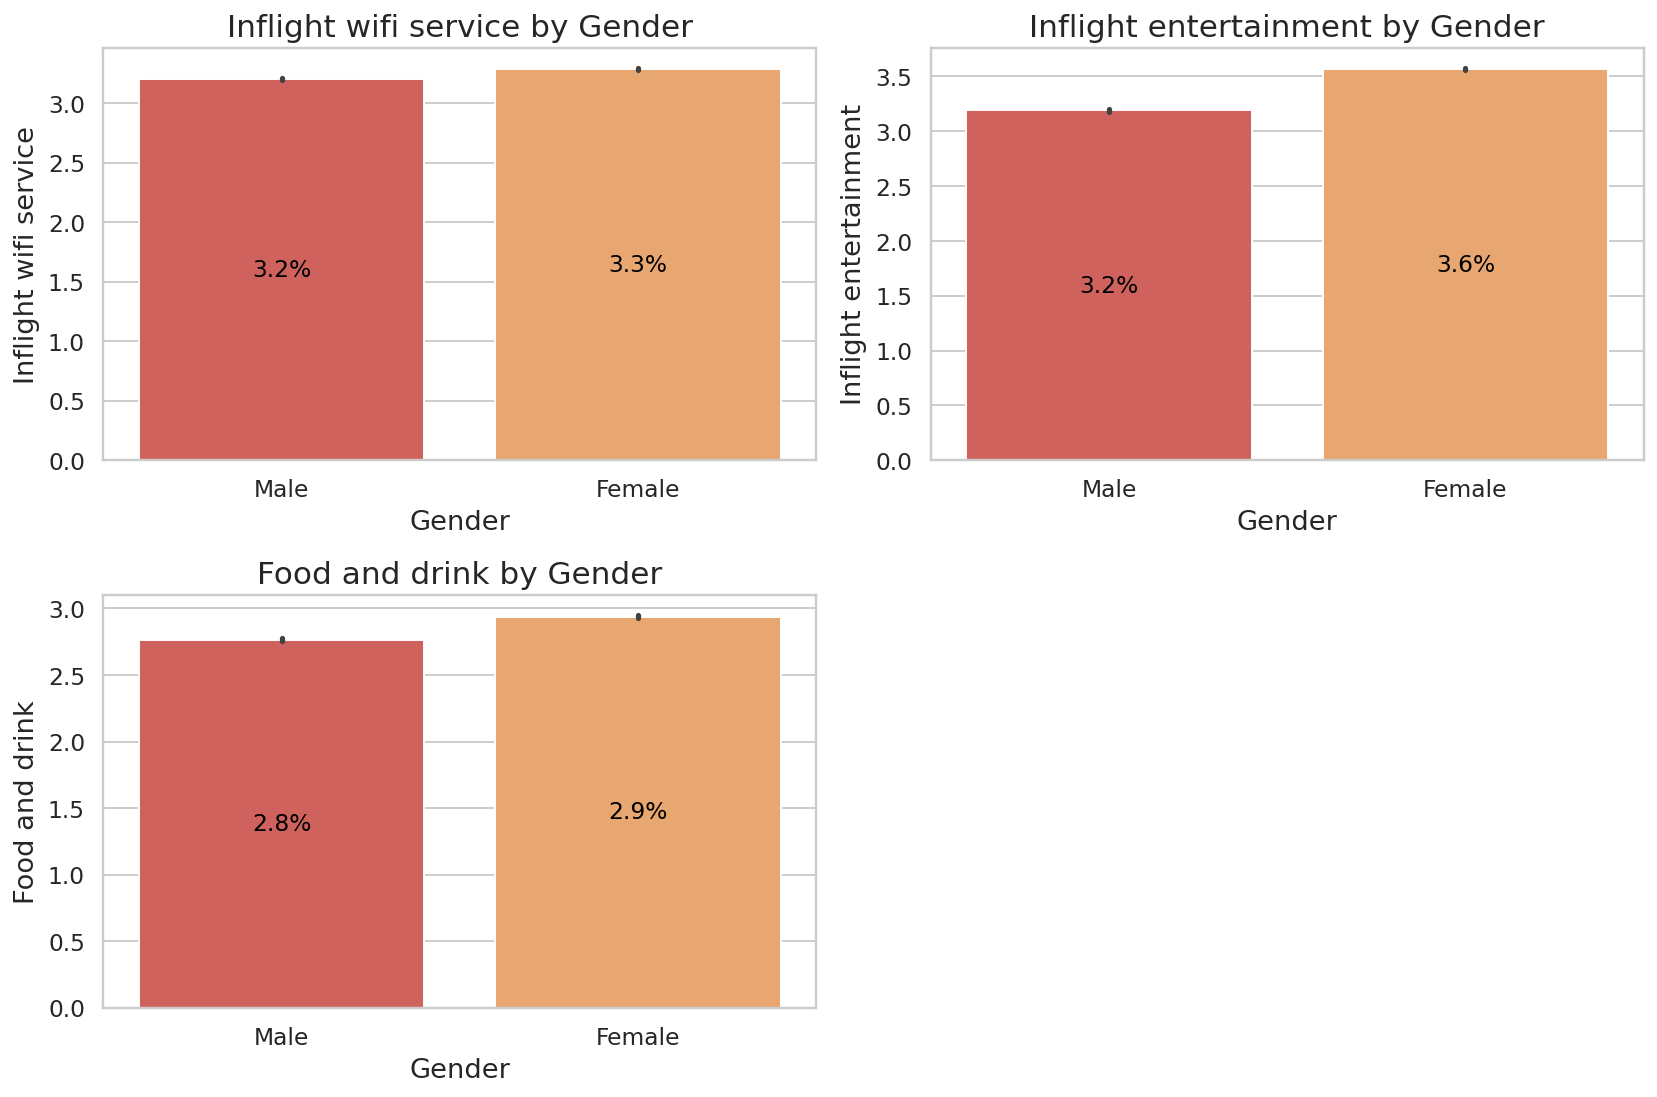

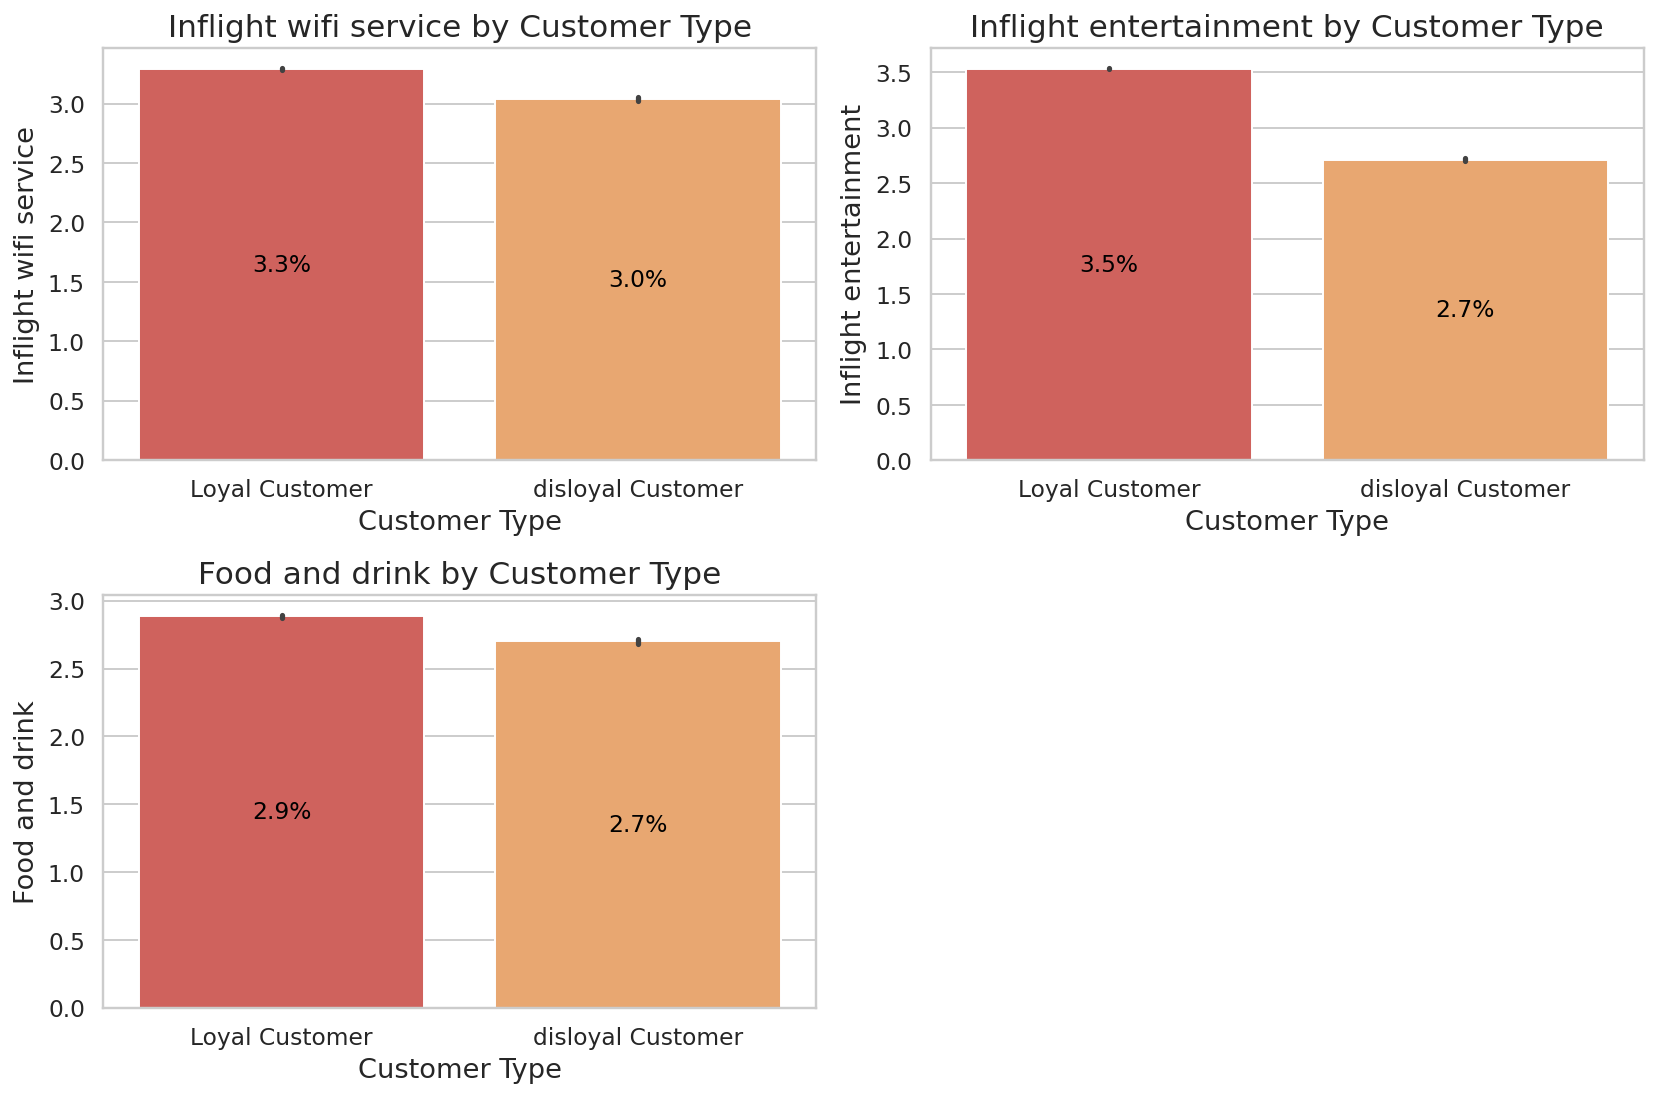

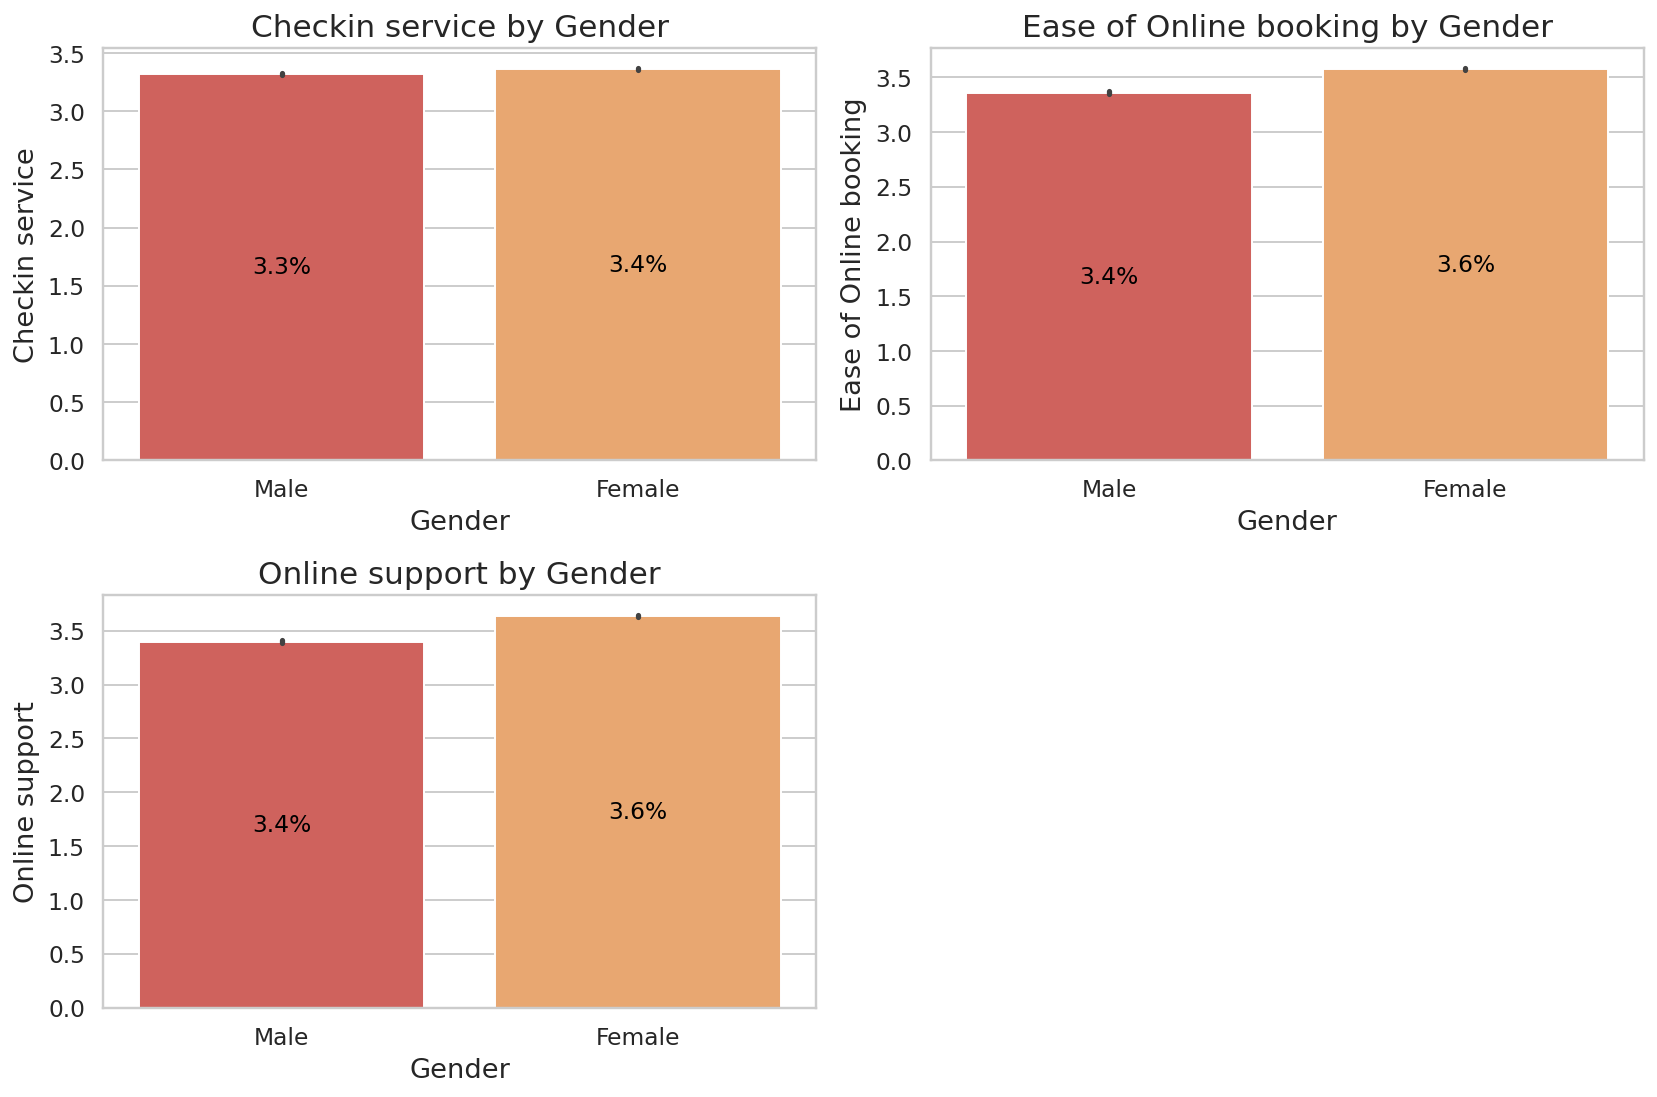

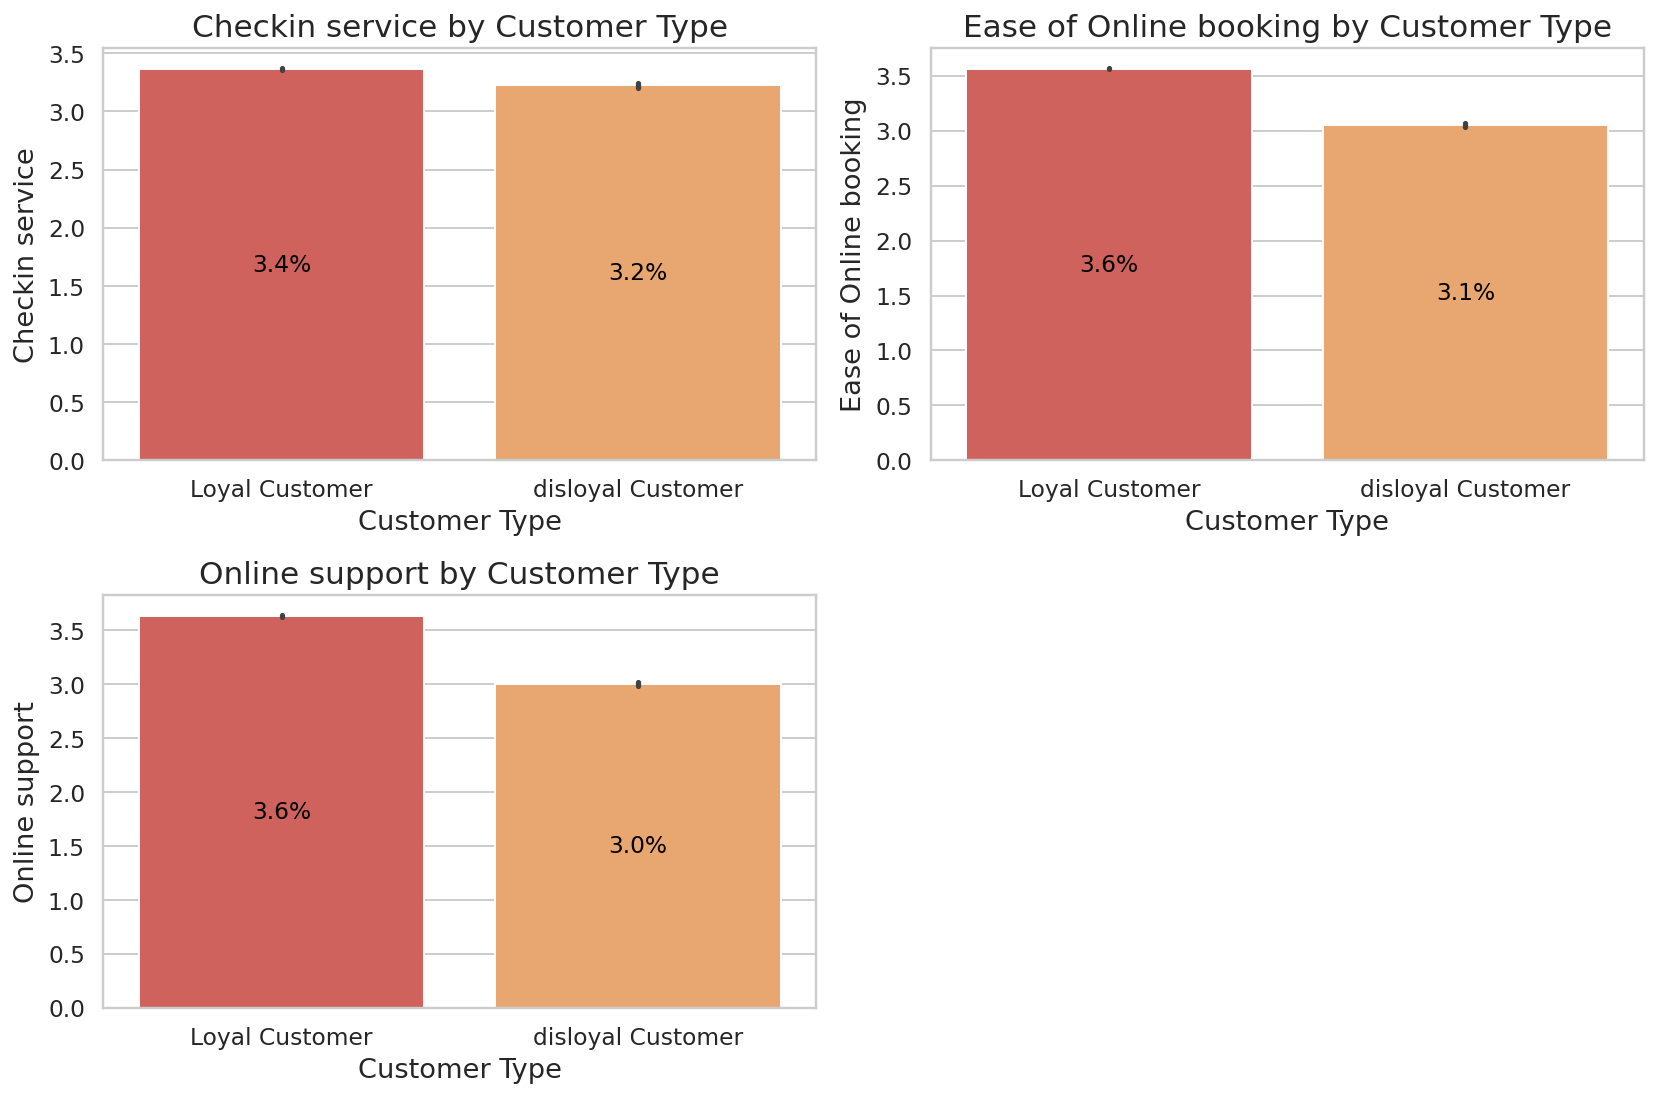

In [31]:
plt.figure(figsize=(12, 8))
for column in inflight_columns:
    plt.subplot(2, 2, inflight_columns.index(column) + 1)
    bar_plot = sns.barplot(x='Gender', y=column, data=df)
    plt.title(f'{column} by Gender')
    
    # Adding percentage labels in the middle of each bar
    for p in bar_plot.patches:
        percentage = f'{p.get_height():.1f}%'
        bar_plot.annotate(percentage, 
                          (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # Centered vertically
                          ha='center', va='center', fontsize=12, color='black', 
                          xytext=(0, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for column in inflight_columns:
    plt.subplot(2, 2, inflight_columns.index(column) + 1)
    bar_plot = sns.barplot(x='Customer Type', y=column, data=df)
    plt.title(f'{column} by Customer Type')
    
    # Adding percentage labels in the middle of each bar
    for p in bar_plot.patches:
        percentage = f'{p.get_height():.1f}%'
        bar_plot.annotate(percentage, 
                          (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # Centered vertically
                          ha='center', va='center', fontsize=12, color='black', 
                          xytext=(0, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for column in ground_columns:
    plt.subplot(2, 2, ground_columns.index(column) + 1)
    bar_plot = sns.barplot(x='Gender', y=column, data=df)
    plt.title(f'{column} by Gender')
    
    # Adding percentage labels in the middle of each bar
    for p in bar_plot.patches:
        percentage = f'{p.get_height():.1f}%'
        bar_plot.annotate(percentage, 
                          (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # Centered vertically
                          ha='center', va='center', fontsize=12, color='black', 
                          xytext=(0, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for column in ground_columns:
    plt.subplot(2, 2, ground_columns.index(column) + 1)
    bar_plot = sns.barplot(x='Customer Type', y=column, data=df)
    plt.title(f'{column} by Customer Type')
    
    # Adding percentage labels in the middle of each bar
    for p in bar_plot.patches:
        percentage = f'{p.get_height():.1f}%'
        bar_plot.annotate(percentage, 
                          (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # Centered vertically
                          ha='center', va='center', fontsize=12, color='black', 
                          xytext=(0, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

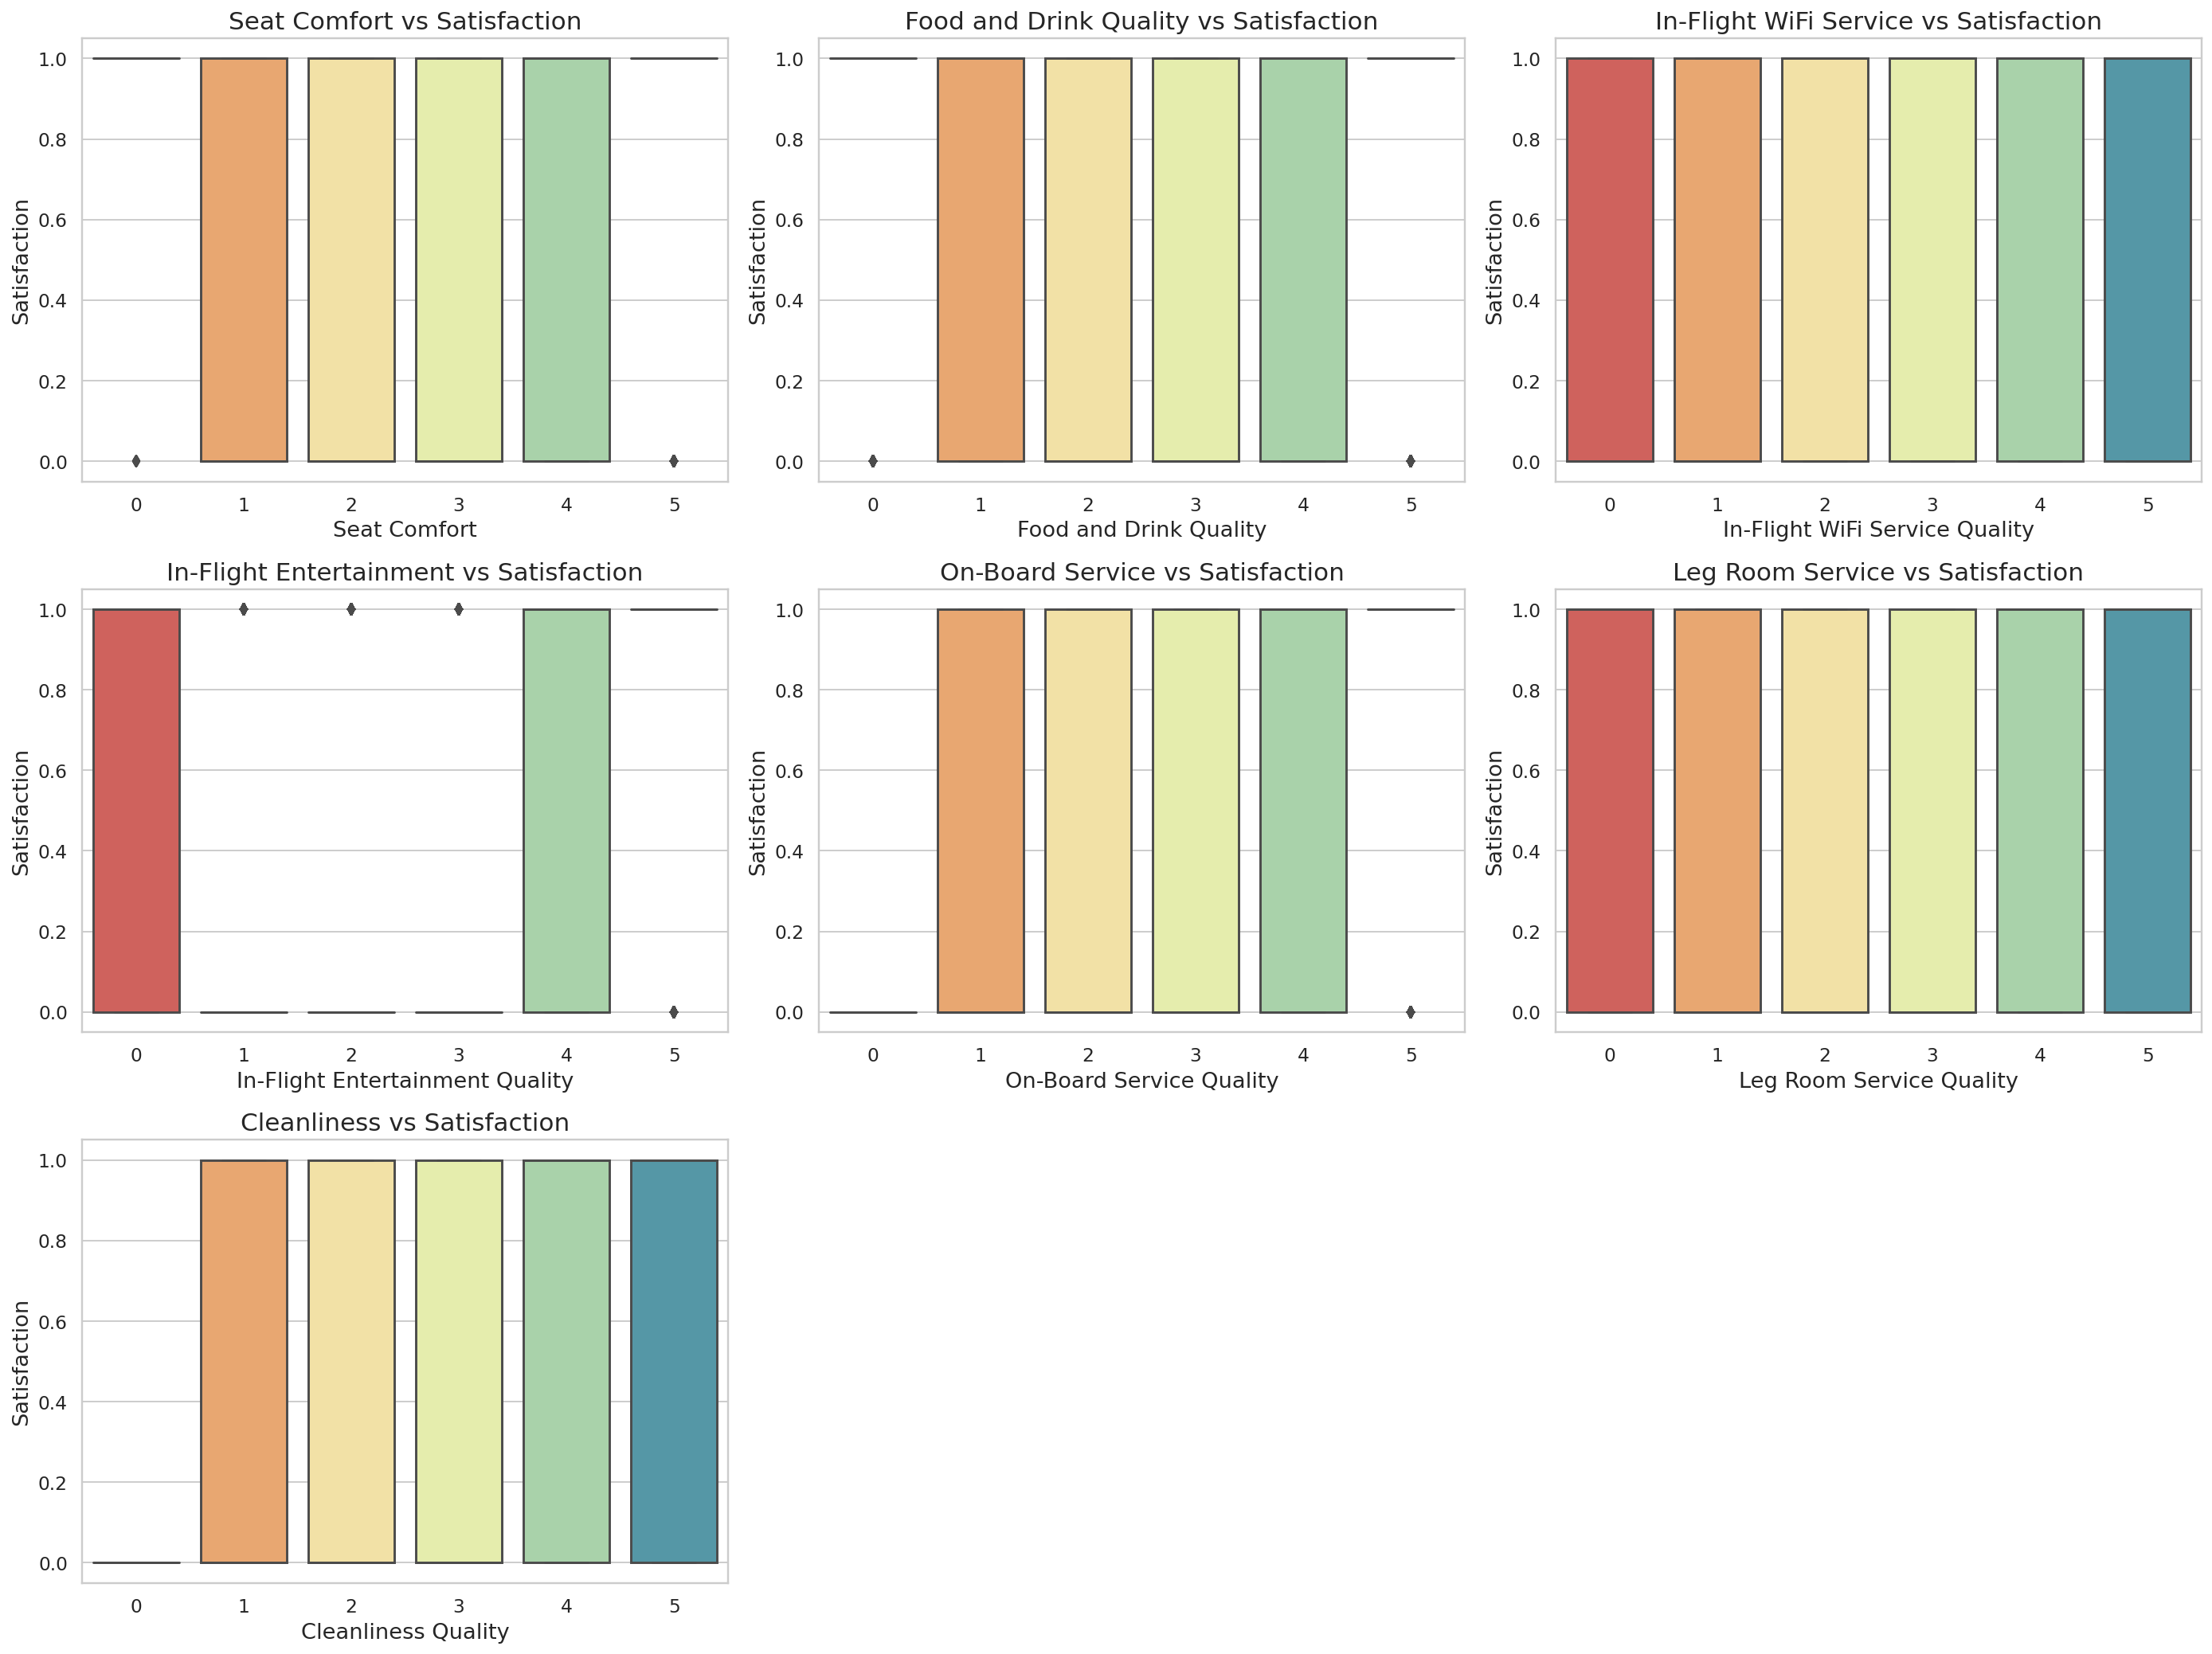

ANOVA result for Seat comfort: F_onewayResult(statistic=6599.977206406199, pvalue=0.0)
ANOVA result for Food and drink: F_onewayResult(statistic=1768.698960178644, pvalue=0.0)
ANOVA result for Inflight wifi service: F_onewayResult(statistic=1492.8026424172085, pvalue=0.0)
ANOVA result for Inflight entertainment: F_onewayResult(statistic=16112.964832020916, pvalue=0.0)
ANOVA result for On-board service: F_onewayResult(statistic=3499.6240104230556, pvalue=0.0)
ANOVA result for Leg room service: F_onewayResult(statistic=2953.785990915338, pvalue=0.0)
ANOVA result for Cleanliness: F_onewayResult(statistic=2385.6761481406265, pvalue=0.0)


In [32]:
# Creating a figure with subplots (3 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Relationship between Seat Comfort and Overall Satisfaction
sns.boxplot(data=df, x='Seat comfort', y='satisfaction_num', ax=axes[0])
axes[0].set_title('Seat Comfort vs Satisfaction')
axes[0].set_xlabel('Seat Comfort')
axes[0].set_ylabel('Satisfaction')

# 2. Impact of Food and Drink Quality on Satisfaction
sns.boxplot(data=df, x='Food and drink', y='satisfaction_num', ax=axes[1])
axes[1].set_title('Food and Drink Quality vs Satisfaction')
axes[1].set_xlabel('Food and Drink Quality')
axes[1].set_ylabel('Satisfaction')

# 3. Effect of In-Flight WiFi Service on Customer Satisfaction
sns.boxplot(data=df, x='Inflight wifi service', y='satisfaction_num', ax=axes[2])
axes[2].set_title('In-Flight WiFi Service vs Satisfaction')
axes[2].set_xlabel('In-Flight WiFi Service Quality')
axes[2].set_ylabel('Satisfaction')

# 4. Correlation between In-Flight Entertainment Quality and Satisfaction
sns.boxplot(data=df, x='Inflight entertainment', y='satisfaction_num', ax=axes[3])
axes[3].set_title('In-Flight Entertainment vs Satisfaction')
axes[3].set_xlabel('In-Flight Entertainment Quality')
axes[3].set_ylabel('Satisfaction')

# 5. Impact of On-Board Service on Overall Satisfaction
sns.boxplot(data=df, x='On-board service', y='satisfaction_num', ax=axes[4])
axes[4].set_title('On-Board Service vs Satisfaction')
axes[4].set_xlabel('On-Board Service Quality')
axes[4].set_ylabel('Satisfaction')

# 6. Effect of Leg Room Service on Customer Satisfaction
sns.boxplot(data=df, x='Leg room service', y='satisfaction_num', ax=axes[5])
axes[5].set_title('Leg Room Service vs Satisfaction')
axes[5].set_xlabel('Leg Room Service Quality')
axes[5].set_ylabel('Satisfaction')

# 7. Relationship between Cleanliness and Overall Satisfaction
sns.boxplot(data=df, x='Cleanliness', y='satisfaction_num', ax=axes[6])
axes[6].set_title('Cleanliness vs Satisfaction')
axes[6].set_xlabel('Cleanliness Quality')
axes[6].set_ylabel('Satisfaction')

# Hide the last empty subplot (if any)
axes[7].axis('off')  # Empty space in the last row
axes[8].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Perform ANOVA tests for each category and print results
for feature in ['Seat comfort', 'Food and drink', 'Inflight wifi service', 
                'Inflight entertainment', 'On-board service', 
                'Leg room service', 'Cleanliness']:
    groups = df.groupby(feature)['satisfaction_num'].apply(list)
    anova_result = stats.f_oneway(*groups)
    print(f'ANOVA result for {feature}:', anova_result)

# Delay Impact Analysis
- What is the overall impact of delays on customer satisfaction?
- Is there a threshold of delay time after which satisfaction drops significantly?
- How do departure delays compare to arrival delays in terms of impact on satisfaction?
- Does the impact of delays vary based on flight distance or travel type?

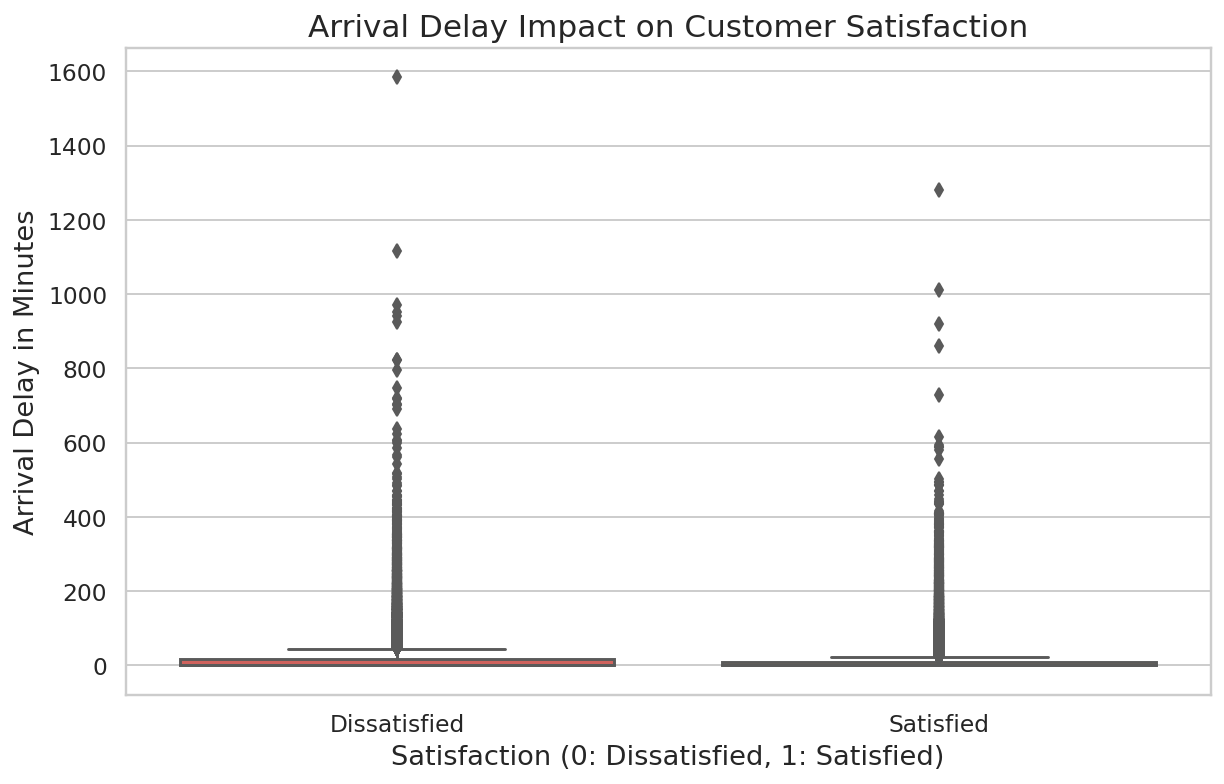

In [33]:
# Overall impact of delays on customer satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction_num', y='Arrival Delay in Minutes', data=df)
plt.title('Arrival Delay Impact on Customer Satisfaction')
plt.xlabel('Satisfaction (0: Dissatisfied, 1: Satisfied)')
plt.ylabel('Arrival Delay in Minutes')
plt.xticks([0, 1], ['Dissatisfied', 'Satisfied'])
plt.show()

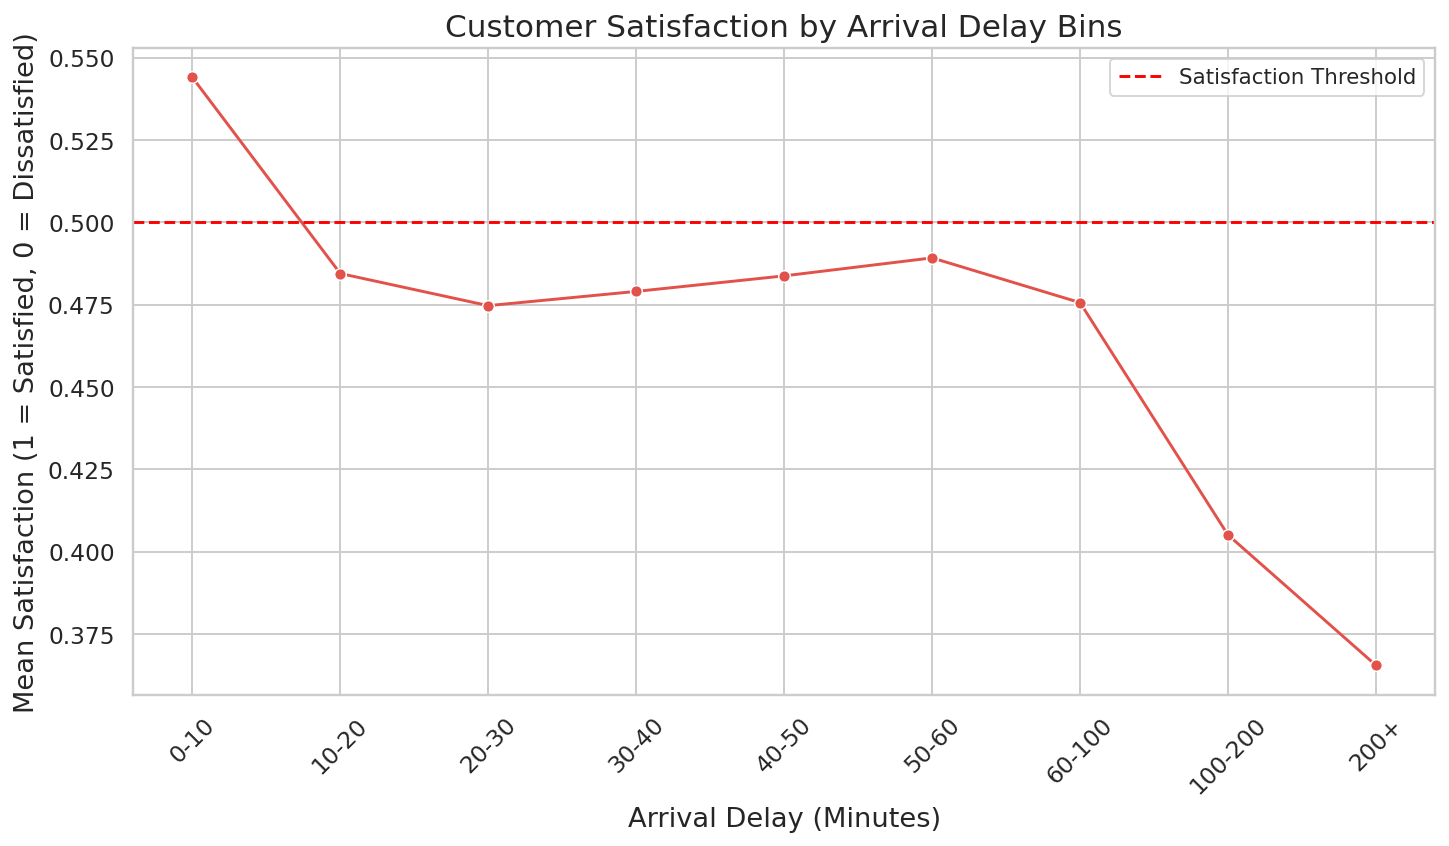

In [34]:
# Calculate mean satisfaction by arrival delay bins
delay_bins = [0, 10, 20, 30, 40, 50, 60, 100, 200, np.inf]
delay_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-100', '100-200', '200+']
df['arrival_delay_bin'] = pd.cut(df['Arrival Delay in Minutes'], bins=delay_bins, labels=delay_labels)

# Calculate satisfaction by delay bins
delay_satisfaction = df.groupby('arrival_delay_bin')['satisfaction_num'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=delay_satisfaction, x='arrival_delay_bin', y='satisfaction_num', marker='o')
plt.title('Customer Satisfaction by Arrival Delay Bins')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Mean Satisfaction (1 = Satisfied, 0 = Dissatisfied)')
plt.xticks(rotation=45)
plt.axhline(y=0.5, color='r', linestyle='--', label='Satisfaction Threshold')
plt.legend()
plt.show()

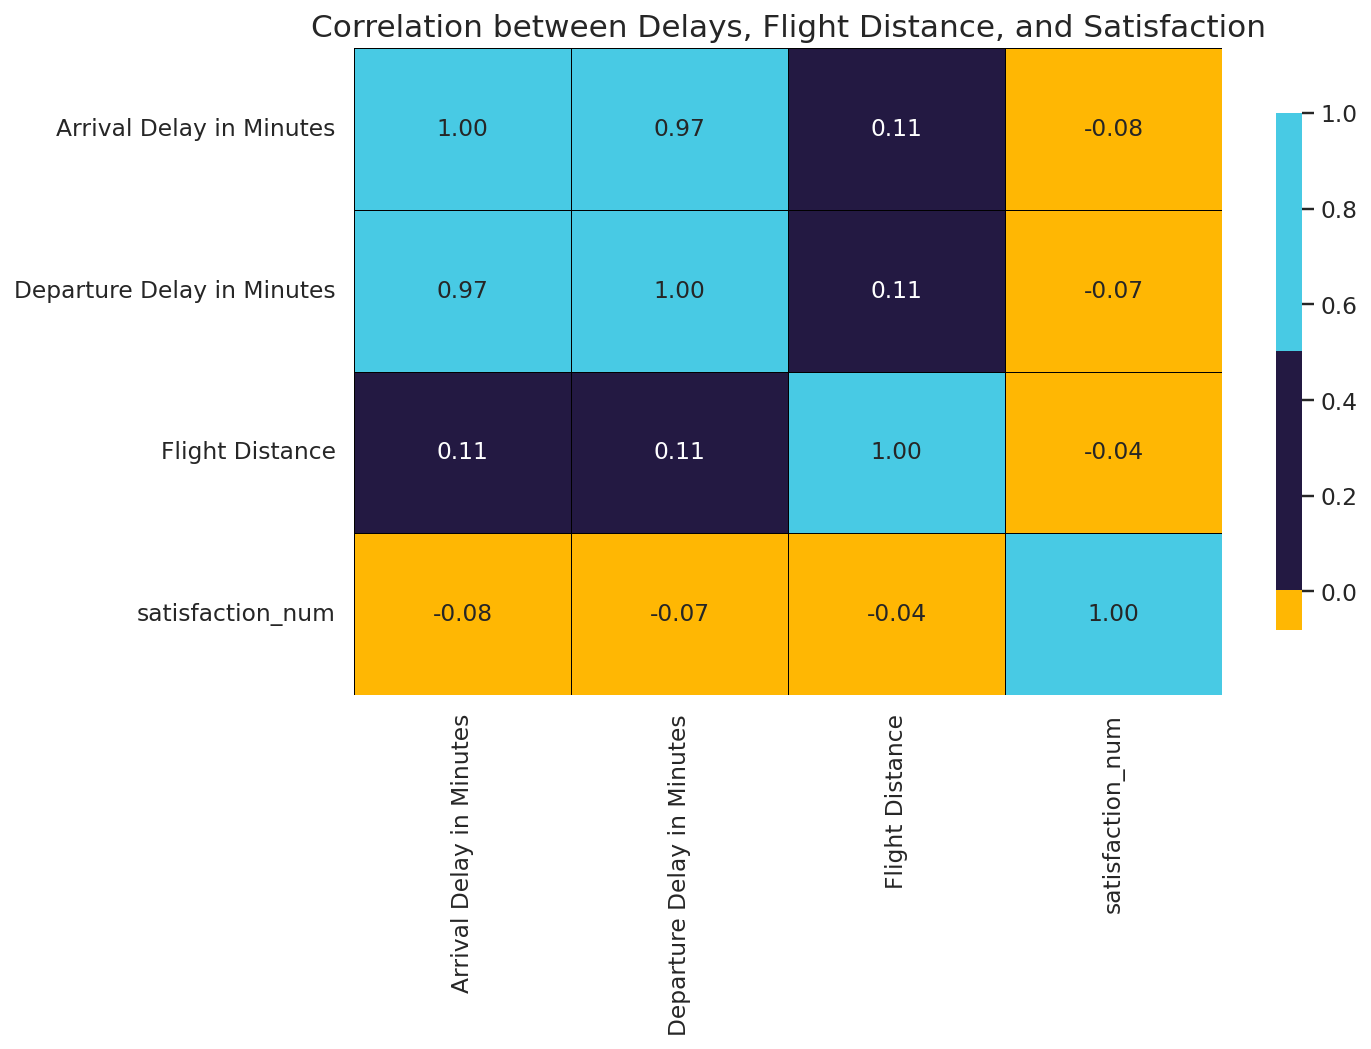

In [35]:
# Analyze impact of delays based on flight distance or travel type
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'satisfaction_num']].corr(), 
    annot=True, 
    fmt='.2f', 
    cmap=cmap,  # Use the custom colormap
    center=0,  # Center the colormap at 0 for better readability
    linewidths=.5,  # Add lines between cells for clarity
    linecolor='black',  # Color of the lines
    cbar_kws={"shrink": .8}  # Adjust the color bar size
)
plt.title('Correlation between Delays, Flight Distance, and Satisfaction')
plt.show()

# Customer Segmentation
- Can we identify distinct groups of customers based on their characteristics and satisfaction levels?
- How do these segments differ in terms of their service preferences and sensitivity to delays?
- Are there any "high-value" segments that are particularly satisfied or dissatisfied?
- How can we tailor services to better meet the needs of different customer segments?

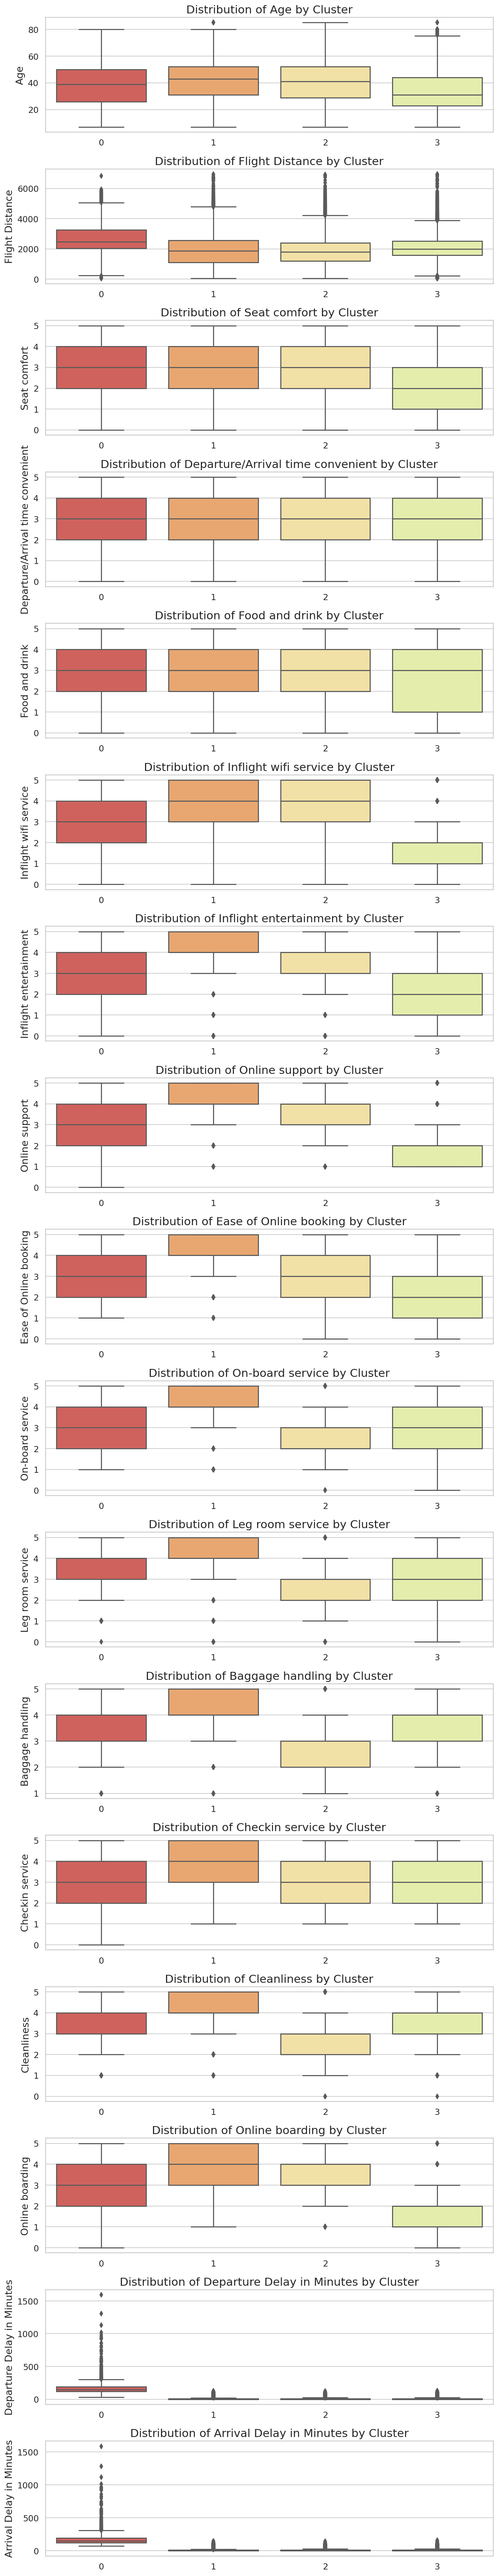

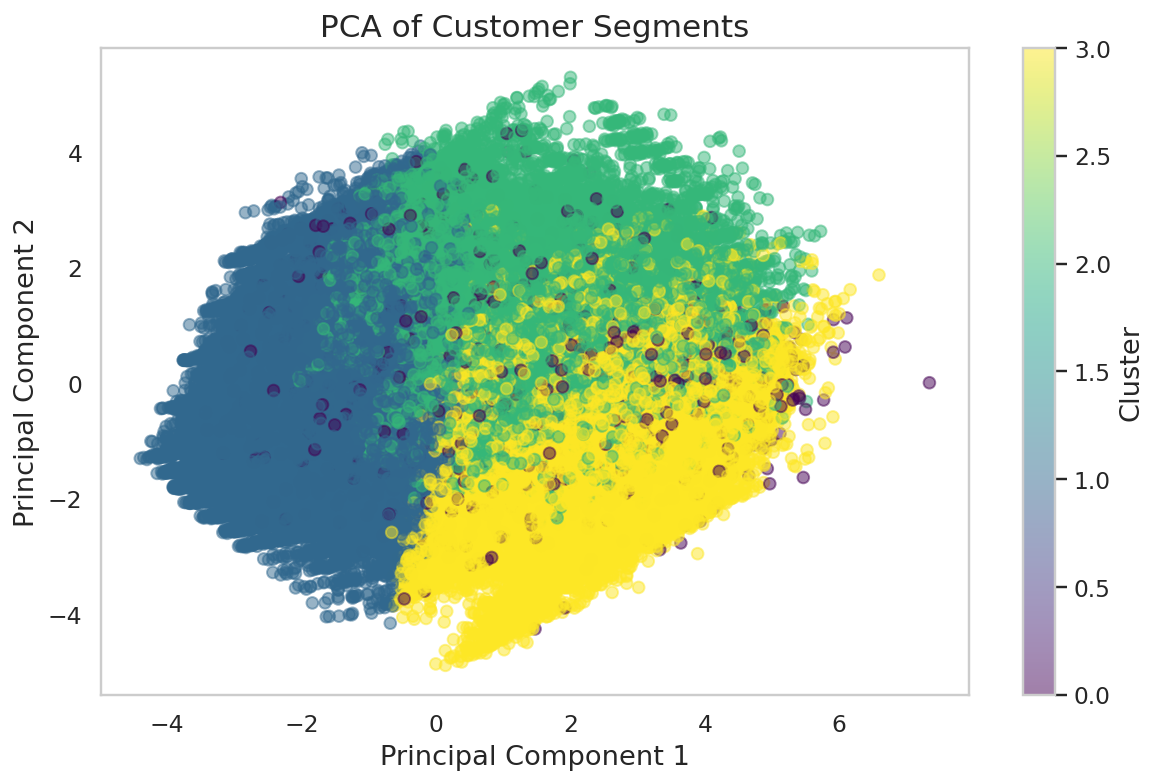

High-value segments based on satisfaction:
Cluster
0     1475
1    43569
2    12247
3     6499
dtype: int64

Cluster 1 Preferences:
Age                                    41.434000
Flight Distance                      1918.484951
Seat comfort                            3.154053
Departure/Arrival time convenient       3.134788
Food and drink                          3.063279
Inflight wifi service                   3.747846
Inflight entertainment                  3.953127
Online support                          4.190998
Ease of Online booking                  4.386259
On-board service                        4.232520
Leg room service                        4.118659
Baggage handling                        4.364871
Checkin service                         3.777040
Cleanliness                             4.382937
Online boarding                         3.988171
Departure Delay in Minutes              8.814335
Arrival Delay in Minutes                8.973039
dtype: float64

Cluster 3 Preferenc

In [36]:
# Select features for segmentation
features = [
    'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
    'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 
    'Online support', 'Ease of Online booking', 'On-board service', 
    'Leg room service', 'Baggage handling', 'Checkin service', 
    'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 
    'Arrival Delay in Minutes'
]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters, filtering only numeric columns
cluster_analysis = df.groupby('Cluster')[features].mean()

# Visualize clusters with subplots
num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, num_features * 3))
for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Cluster')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('PCA of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Identify high-value segments based on satisfaction
high_value_segments = df[df['satisfaction_num'] == 1].groupby('Cluster').size()
print("High-value segments based on satisfaction:")
print(high_value_segments)

# Tailor service recommendations based on cluster preferences
for cluster in df['Cluster'].unique():
    preferences = df[df['Cluster'] == cluster][features].mean()
    print(f"\nCluster {cluster} Preferences:")
    print(preferences)

### Detailed Report on High-Value Segments Based on Satisfaction

The analysis focuses on identifying high-value customer segments using KMeans clustering, with a particular emphasis on customer satisfaction. Below, we analyze each cluster, highlighting its preferences and making recommendations for improving satisfaction and services.

---

### **1. High-Value Segment Analysis**
Based on the customer satisfaction (`satisfaction_num == 1`), we observe the number of satisfied customers in each cluster:

```plaintext
Cluster 0     : 1,475 satisfied customers
Cluster 1     : 43,569 satisfied customers
Cluster 2     : 12,247 satisfied customers
Cluster 3     : 6,499 satisfied customers
```

**Key Observations:**
- **Cluster 1** is the largest segment with 43,569 satisfied customers, making it the primary high-value segment.
- **Cluster 3** is the smallest segment with 6,499 satisfied customers.
- **Cluster 0** has the highest delays, both in departure and arrival times.
- **Cluster 2** exhibits moderate satisfaction, but service ratings are generally lower than Cluster 1.

---

### **2. Cluster Preferences and Recommendations**

#### **Cluster 1 Preferences** (Primary High-Value Segment)
- **Size**: 43,569 satisfied customers
- **Age**: 41.4 years on average
- **Flight Distance**: Moderate (1,918 km)
- **Service Ratings**:
  - Strong preferences for **Inflight Entertainment** (3.95), **Online Support** (4.19), **Ease of Online Booking** (4.39), and **Cleanliness** (4.38).
  - **Inflight wifi service** (3.75) and **On-board service** (4.23) are high-rated.
- **Delay**: Low (around 8.8-9 minutes)

**Recommendations**:
- **Maintain excellence**: Continue providing high-quality inflight entertainment, cleanliness, and online support services, as these are key drivers of satisfaction.
- **Boost inflight wifi**: This service is important but slightly underperforms compared to others; improving it could further enhance customer satisfaction.
- **Service consistency**: Keep delays minimal, as they are already low compared to other clusters.

---

#### **Cluster 3 Preferences** (Small High-Value Segment)
- **Size**: 6,499 satisfied customers
- **Age**: 34.0 years (younger than other clusters)
- **Flight Distance**: Longer (2,123 km)
- **Service Ratings**:
  - Lower scores for **Inflight wifi service** (1.84), **Inflight entertainment** (2.31), and **Online Support** (1.94).
  - Higher ratings for **Leg Room Service** (3.27) and **On-board service** (3.23).
  - **Departure/Arrival Delay**: High (around 10 minutes).
  
**Recommendations**:
- **Improve digital services**: The low ratings for inflight wifi, online support, and entertainment suggest dissatisfaction with these services. Prioritize upgrades in these areas.
- **Optimize travel experience for younger travelers**: Given that this group is younger, investing in more dynamic and engaging digital offerings might be critical.
- **Reduce delays**: Although delays aren't extreme, reducing them could enhance the travel experience and increase satisfaction further.

---

#### **Cluster 0 Preferences** (Small High-Delay Cluster)
- **Size**: 1,475 satisfied customers
- **Age**: 38.7 years
- **Flight Distance**: Longest (2,713 km)
- **Service Ratings**:
  - Moderate to low ratings for **Inflight Entertainment** (3.19), **Online Support** (3.31), and **Check-in Service** (3.21).
  - **On-board service** (3.23) and **Leg Room Service** (3.56) are slightly above average.
- **Delays**: Extremely high (around 170 minutes).

**Recommendations**:
- **Address delay issues**: The extreme departure/arrival delays are the primary concern in this segment. Reducing delays would have a significant positive impact.
- **Improve entertainment and digital support**: The long flight distances in this cluster make inflight entertainment and wifi even more crucial. Enhancing these services could mitigate the negative impact of long delays.
- **Consider better communication**: If delays are unavoidable, consider better real-time communication to manage customer expectations and provide support throughout the journey.

---

#### **Cluster 2 Preferences** (Moderate-Value Segment)
- **Size**: 12,247 satisfied customers
- **Age**: 40.8 years
- **Flight Distance**: Moderate (1,865 km)
- **Service Ratings**:
  - **Online support** (3.77) and **Inflight Entertainment** (3.36) are above average.
  - **On-board service** (2.35), **Leg Room Service** (2.56), and **Baggage Handling** (2.53) score low.
- **Delays**: Moderate (around 9.6-10 minutes).

**Recommendations**:
- **Improve comfort-related services**: Lower scores for on-board service, legroom, and baggage handling suggest that comfort and convenience are key issues. These areas should be prioritized for improvement.
- **Focus on inflight and post-flight support**: While inflight entertainment and online support perform relatively well, addressing post-flight concerns such as baggage handling could further boost satisfaction.
- **Manage delays**: Moderate delays are still present, so efforts to streamline departure and arrival processes would enhance overall satisfaction.

---

### **3. Decision-Making Strategy**

Based on the analysis of these high-value segments, here are the key strategic decisions to consider:

1. **Prioritize Cluster 1**:
   - With the largest share of satisfied customers, this segment should be the primary focus for maintaining customer loyalty. Investments in **digital services** (wifi, entertainment, and online support) would further solidify their satisfaction.

2. **Enhance Digital Services for Cluster 3**:
   - Cluster 3, though smaller, shows room for improvement in **digital and inflight entertainment** services. Enhancing these offerings could lead to significant satisfaction gains, particularly among younger travelers.

3. **Address Delays in Cluster 0**:
   - Cluster 0 suffers from severe delays, which could lead to dissatisfaction over time. Reducing delays, or at least improving communication and compensatory services, could significantly enhance this segment’s satisfaction.

4. **Improve Comfort and Convenience for Cluster 2**:
   - For Cluster 2, improvements in **onboard service, legroom, and baggage handling** would have a positive impact. These customers appear to value convenience and comfort over other factors.

By targeting improvements tailored to each cluster's preferences, the company can optimize its service offerings and increase overall customer satisfaction across different traveler types.